###### By Laras Puji Pramesty (4 Juni 2023)

# Load Dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import gc

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from scipy.stats import norm
from sklearn import tree
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #normalize features
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 


In [2]:
#Setting Output
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

%matplotlib inline 

In [3]:
test=pd.read_csv("../Final Project Rakamin/application_test.csv")
credit_card_balance=pd.read_csv("../Final Project Rakamin/credit_card_balance.csv")
installments_payments=pd.read_csv("../Final Project Rakamin/installments_payments.csv")
bureau=pd.read_csv("../Final Project Rakamin/bureau.csv")
bureau_balance=pd.read_csv("../Final Project Rakamin/bureau_balance.csv")
pos_cash=pd.read_csv("../Final Project Rakamin/POS_CASH_balance.csv")
prev_applications=pd.read_csv("../Final Project Rakamin/previous_application.csv")


In [4]:
print("Application test:",test.shape)
print("Credit card balance:",credit_card_balance.shape)
print("Installements Payements:",installments_payments.shape)
print("Bureau:",bureau.shape)
print("Bureau balance:",bureau_balance.shape)
print("POS_cash Balance:",pos_cash.shape)
print("Previous Applications:",prev_applications.shape)

Application test: (48744, 121)
Credit card balance: (3840312, 23)
Installements Payements: (13605401, 8)
Bureau: (1716428, 17)
Bureau balance: (27299925, 3)
POS_cash Balance: (10001358, 8)
Previous Applications: (1670214, 37)


In [5]:
#Data Application Train
df_train = pd.read_csv("../Final Project Rakamin/application_train.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

This dataset has 307511 rows dan 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [21]:
df_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## Distribution of Target variable
From the description 0 means that loan is repayed and 1 means loan is not repayed.
As you can see that the percentage of y=1 is very less and the data set is skewed. So the best metric to test the performance is ROC

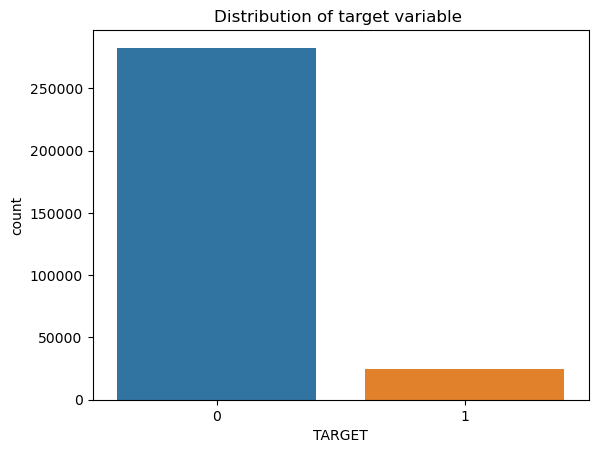

In [6]:
sns.countplot(data =df_train,x='TARGET')
plt.title("Distribution of target variable ")
plt.show()

In [23]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Check Dataset

In [7]:
#Check Data Types
print('Tipe Data: \n')
df_train.info(verbose=True)

Tipe Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int

In [8]:
# Check Data Shape
df_train.shape

(307511, 122)

# Data Preprocessing


In [28]:
def missing_data(data):
    na=pd.DataFrame()
    na['number']=data.isnull().sum().sort_values(ascending=False)
    na['Percent']=data.isnull().sum()/data.shape[0]*100
    na.drop(index=na.loc[na['number']==0].index,inplace=True)
    return na

In [29]:
print(missing_data(df_train).shape[0])
missing_data(df_train).head(10)

67


,number,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [85]:
print(missing_data(test).shape[0])
missing_data(test).head(10)

64


,number,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


## EXPLORATION THE DATASET

### Binary Feature
NAME_CONTRACT_TYPE: Identification if loan is cash or revolving

FLAG_OWN_REALTY: Flag if client owns a house or flat

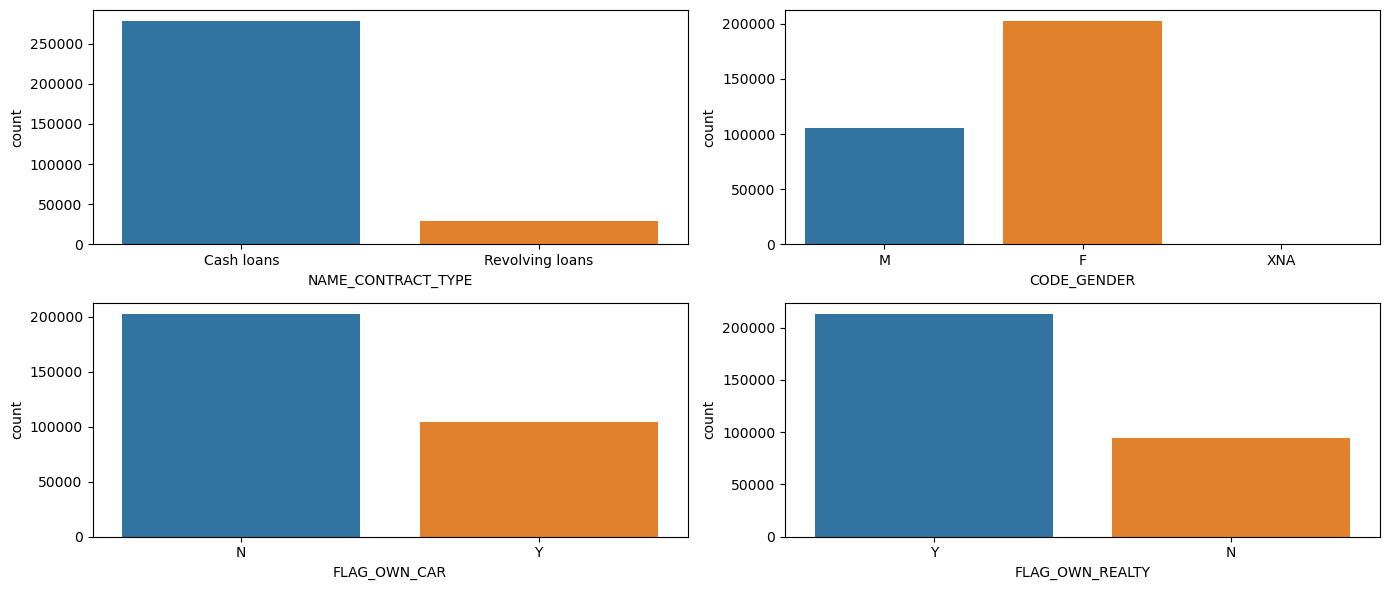

In [9]:
f =plt.figure(figsize=(14,6))
ax= f.add_subplot(221)
sns.countplot(data = df_train, x='NAME_CONTRACT_TYPE')
ax=f.add_subplot(222)
sns.countplot(df_train, x='CODE_GENDER')
ax=f.add_subplot(223)
sns.countplot(df_train, x='FLAG_OWN_CAR')
ax=f.add_subplot(224)
sns.countplot(df_train, x='FLAG_OWN_REALTY')
plt.tight_layout()

In [31]:
# convert to categorical type
df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] =   df_train[
    ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].astype('object')
test[['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] =   test[
    ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].astype('object')

# Visualization

In [10]:
round(df_train['AMT_CREDIT'].describe())

count     307511.0
mean      599026.0
std       402491.0
min        45000.0
25%       270000.0
50%       513531.0
75%       808650.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64

<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

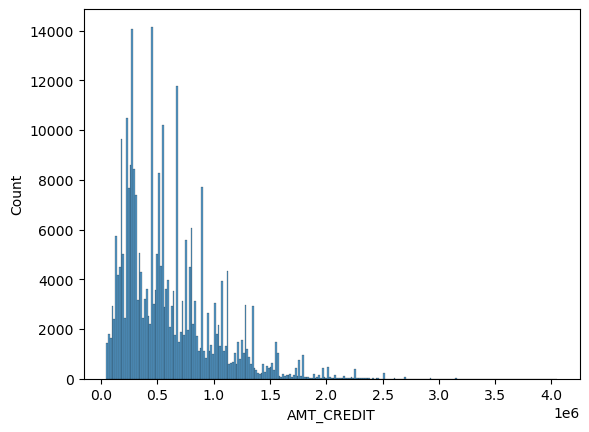

In [11]:
sns.histplot(df_train['AMT_CREDIT'])

In [12]:
round(df_train['AMT_INCOME_TOTAL'].describe())

count       307511.0
mean        168798.0
std         237123.0
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\3357333952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_INCOME_TOTAL'])


<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

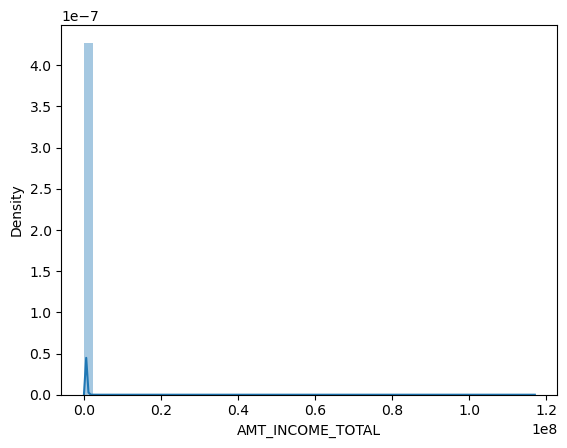

In [13]:
sns.distplot(df_train['AMT_INCOME_TOTAL'])

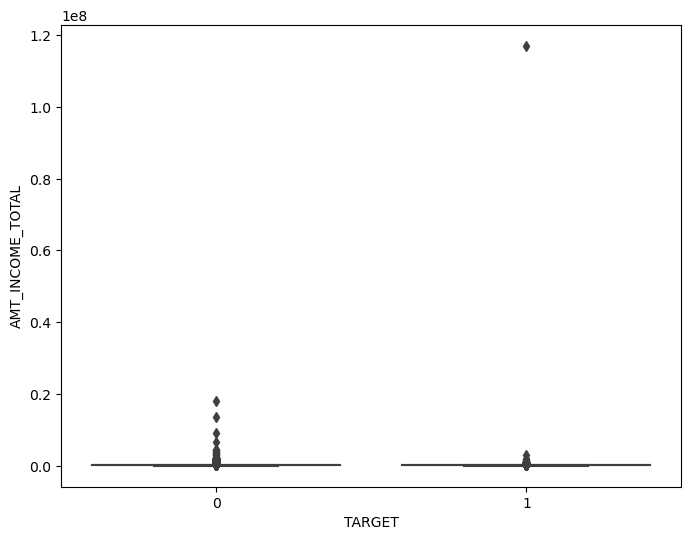

In [14]:
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=df_train['TARGET'],y=df_train['AMT_INCOME_TOTAL'])

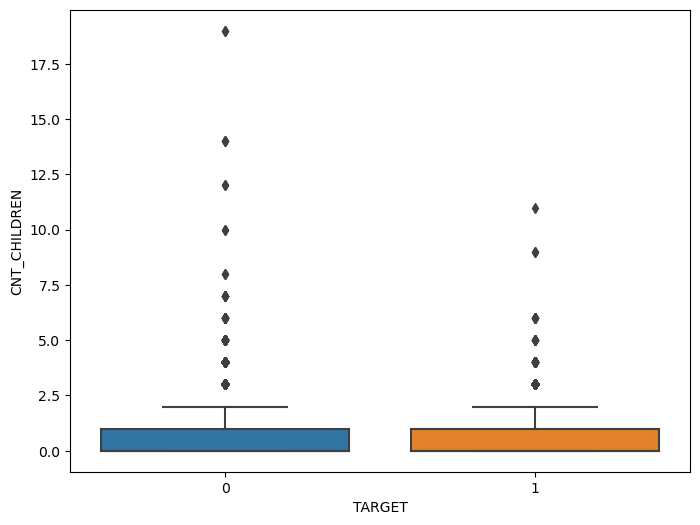

In [15]:
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=df_train['TARGET'],y=df_train['CNT_CHILDREN'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3707717060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df_train.corr()


<Axes: >

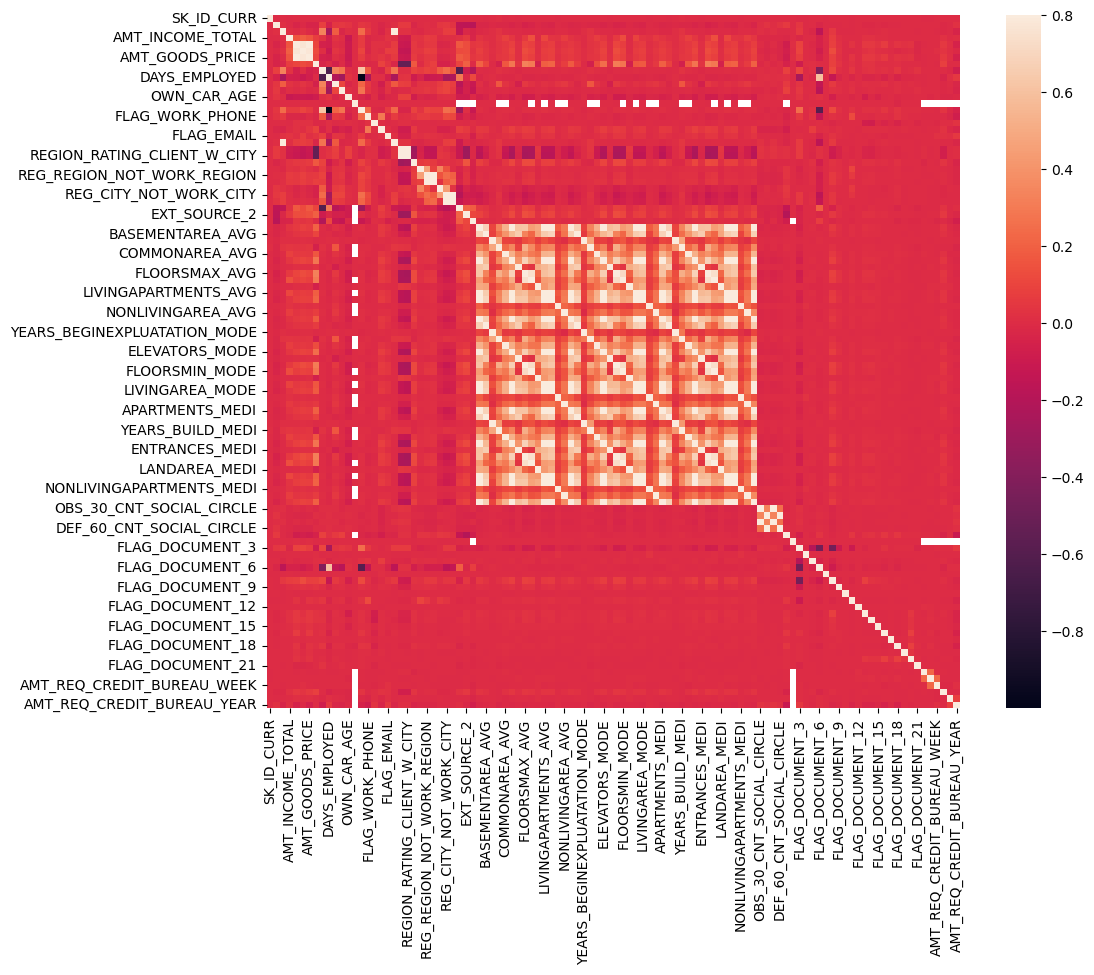

In [38]:
correlation=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(correlation,vmax=.8,square=True)

In [16]:
corr = df_train.corr().abs()

sort = corr.unstack()
so = sort.sort_values(kind="quicksort")
print(so.head())



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\1494212530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr().abs()


BASEMENTAREA_MODE           AMT_REQ_CREDIT_BUREAU_HOUR      0.000004
AMT_REQ_CREDIT_BUREAU_HOUR  BASEMENTAREA_MODE               0.000004
FLAG_MOBIL                  FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_12            FLAG_MOBIL                      0.000005
FLAG_DOCUMENT_4             YEARS_BEGINEXPLUATATION_MODE    0.000005
dtype: float64


In [40]:
df_train=df_train.drop(['WEEKDAY_APPR_PROCESS_START','FLAG_EMP_PHONE','REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT','REG_REGION_NOT_WORK_REGION'],axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\2049499323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_INCOME_TOTAL'], kde=True)


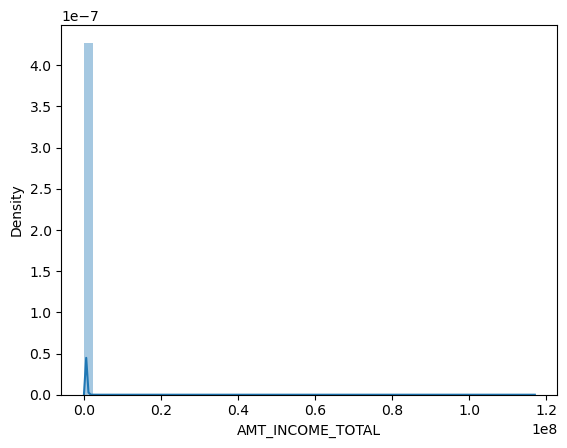

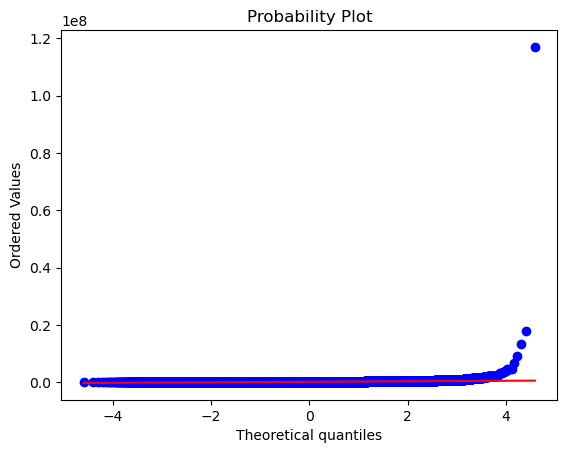

In [17]:
sns.distplot(df_train['AMT_INCOME_TOTAL'], kde=True)
fig =plt.figure()
prob =stats.probplot(df_train['AMT_INCOME_TOTAL'],plot=plt)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\471015739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_INCOME_TOTAL'], fit = norm)


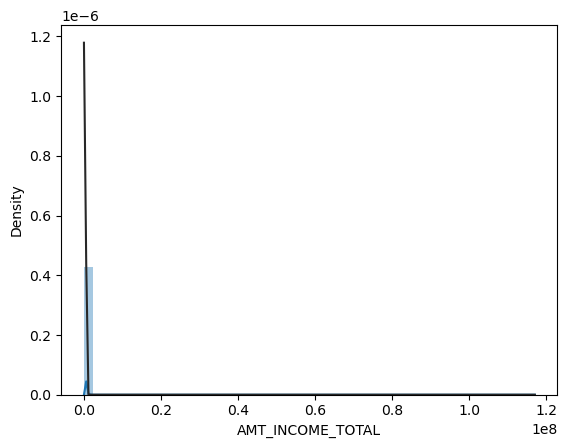

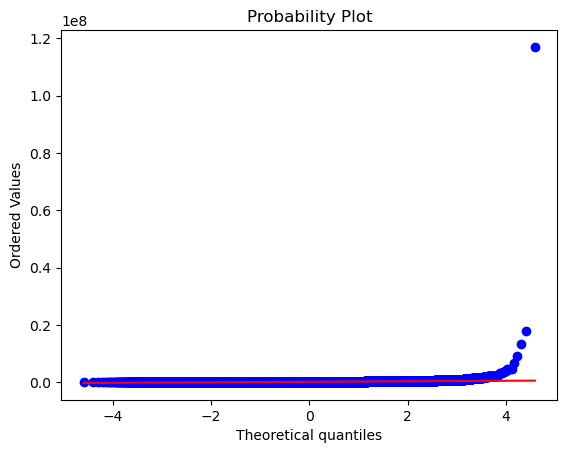

In [41]:
sns.distplot(df_train['AMT_INCOME_TOTAL'], fit = norm)
fig =plt.figure()
prob =stats.probplot(df_train['AMT_INCOME_TOTAL'],plot=plt)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\1406665125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_CREDIT'],fit=norm)


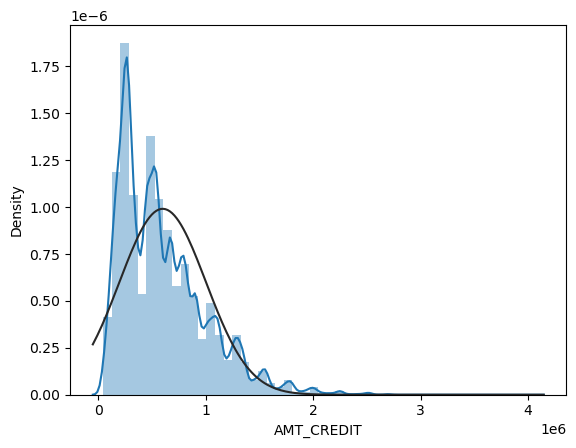

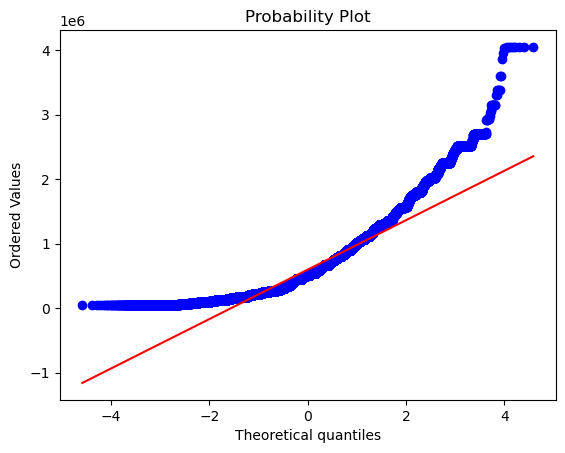

In [18]:
sns.distplot(df_train['AMT_CREDIT'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['AMT_CREDIT'],plot=plt)

In [43]:
x=df_train[['DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL','CNT_CHILDREN','REGION_POPULATION_RELATIVE']]
y=df_train['TARGET']

In [44]:
clf=tree.DecisionTreeClassifier(min_samples_split=20)
clf=clf.fit(x,y)
y_pred=clf.predict(x)
print (pd.crosstab(y_pred,df_train['TARGET']))

TARGET       0      1
row_0                
0       280894  18421
1         1792   6404


In [180]:
print(metrics.classification_report(y_pred,df_train['TARGET']))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    299317
           1       0.26      0.78      0.39      8194

    accuracy                           0.93    307511
   macro avg       0.63      0.86      0.68    307511
weighted avg       0.97      0.93      0.95    307511



0: Membayar Tepat Waktu/Tidak ada kesulitan pembayaran
1: Memiliki Kesulitan Pembayaran


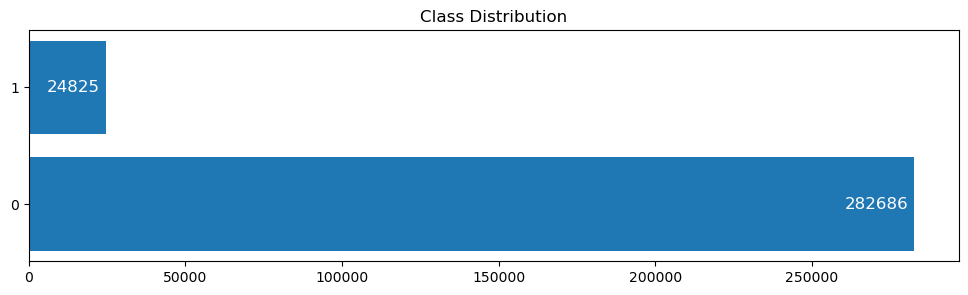

In [45]:
print("0: Membayar Tepat Waktu/Tidak ada kesulitan pembayaran")
print("1: Memiliki Kesulitan Pembayaran")

class_dist = df_train['TARGET'].value_counts()

plt.figure(figsize=(12,3))
plt.title('Class Distribution')
plt.barh(class_dist.index, class_dist.values)
plt.yticks([0, 1])

for i, value in enumerate(class_dist.values):
    plt.text(value-2000, i, str(value), fontsize=12, color='white',
             horizontalalignment='right', verticalalignment='center')

plt.show()

In [46]:
def convert_age(age_days_negative):
    age_days_positive = -age_days_negative
    age_years = age_days_positive/365
    return age_years


In [47]:
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].apply(convert_age)
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].apply(convert_age)


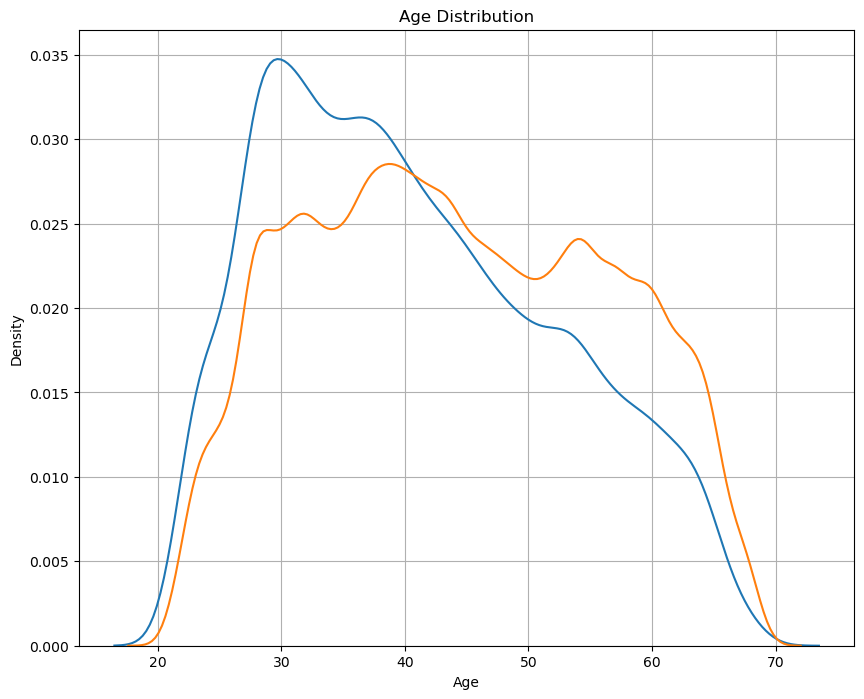

In [48]:
plt.figure(figsize=(10,8))
plt.title('Age Distribution')
plt.xlabel('Age')
sns.kdeplot(df_train[df_train['TARGET']==1]['DAYS_BIRTH'], label='Target=1')
sns.kdeplot(df_train[df_train['TARGET']==0]['DAYS_BIRTH'], label='Target=0')
plt.grid()
plt.show()

In [19]:
train1 = df_train.copy()

In [20]:
decode_map = {0: "Tidak ada Kesulitan Pembayaran", 1: "Kesulitan Pembayaran"}
def decode_sentiment(label):
    return decode_map[int(label)]

train1['TARGET'] = train1['TARGET'].apply(lambda x: decode_sentiment(x))

In [21]:
target_grp = (train1[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,Tidak ada Kesulitan Pembayaran,282686
1,Kesulitan Pembayaran,24825


In [22]:
target = train1['TARGET'].value_counts(normalize=True)
target.reset_index().style.background_gradient(cmap='Oranges')

,index,TARGET
0,Tidak ada Kesulitan Pembayaran,0.919271
1,Kesulitan Pembayaran,0.080729


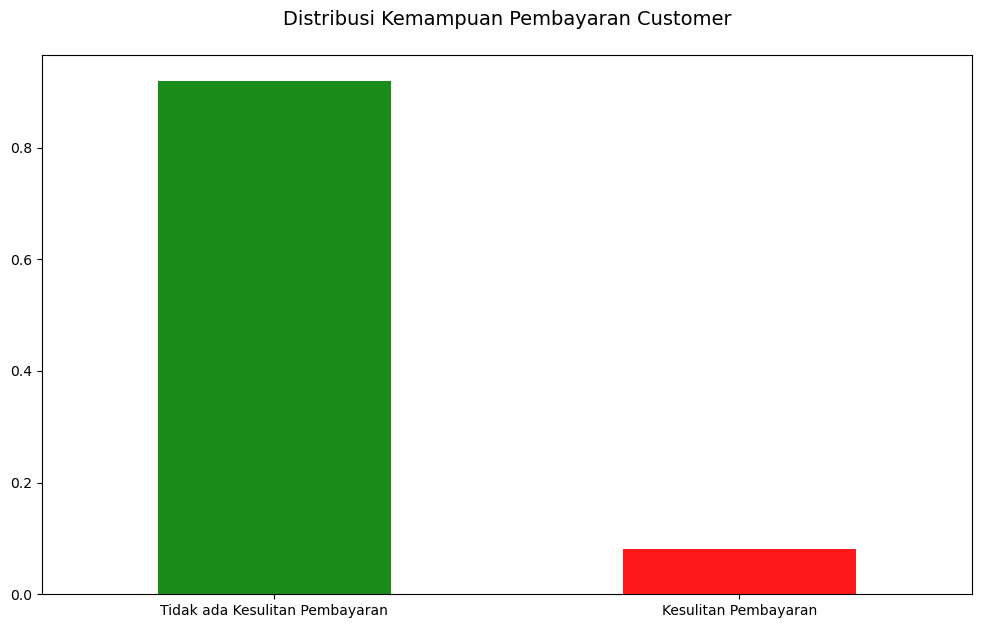

In [23]:
figure = plt.figure(figsize = (12,7))
target.plot(kind='bar', color= ['green','Red'], alpha = 0.9, rot=0)
plt.title('Distribusi Kemampuan Pembayaran Customer\n', fontsize=14)
plt.show()

Berdasarkan Diagram Batang diatas terdapat 91% pinjaman atau setara dengan sekitar 282 Ribu dengan TARGET = 0, dimana menunjukkan bahwa klien Tidak memiliki kesulitan dalam pembayaran. Sedangkan terdapat 8% dari total Pinjaman atau sekitar 24 Ribu dalam dataset ini dimana klien yang memiliki kesulitan pembayaran bermasalah dalam mengembalikan pinjaman

# Bivariate : Categorical Features With Target
Visualization of The Relationship Betweenn 2 Features
Based On Contract Type, Gender, Car Ownership State and Realty Ownership State

#### Contract Type, Gender, Car Ownership Status, and Realty Ownership Status

<Axes: title={'center': '\n Kemampuan Pembayaran berdasarkan Status Kepemilikian Realty\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

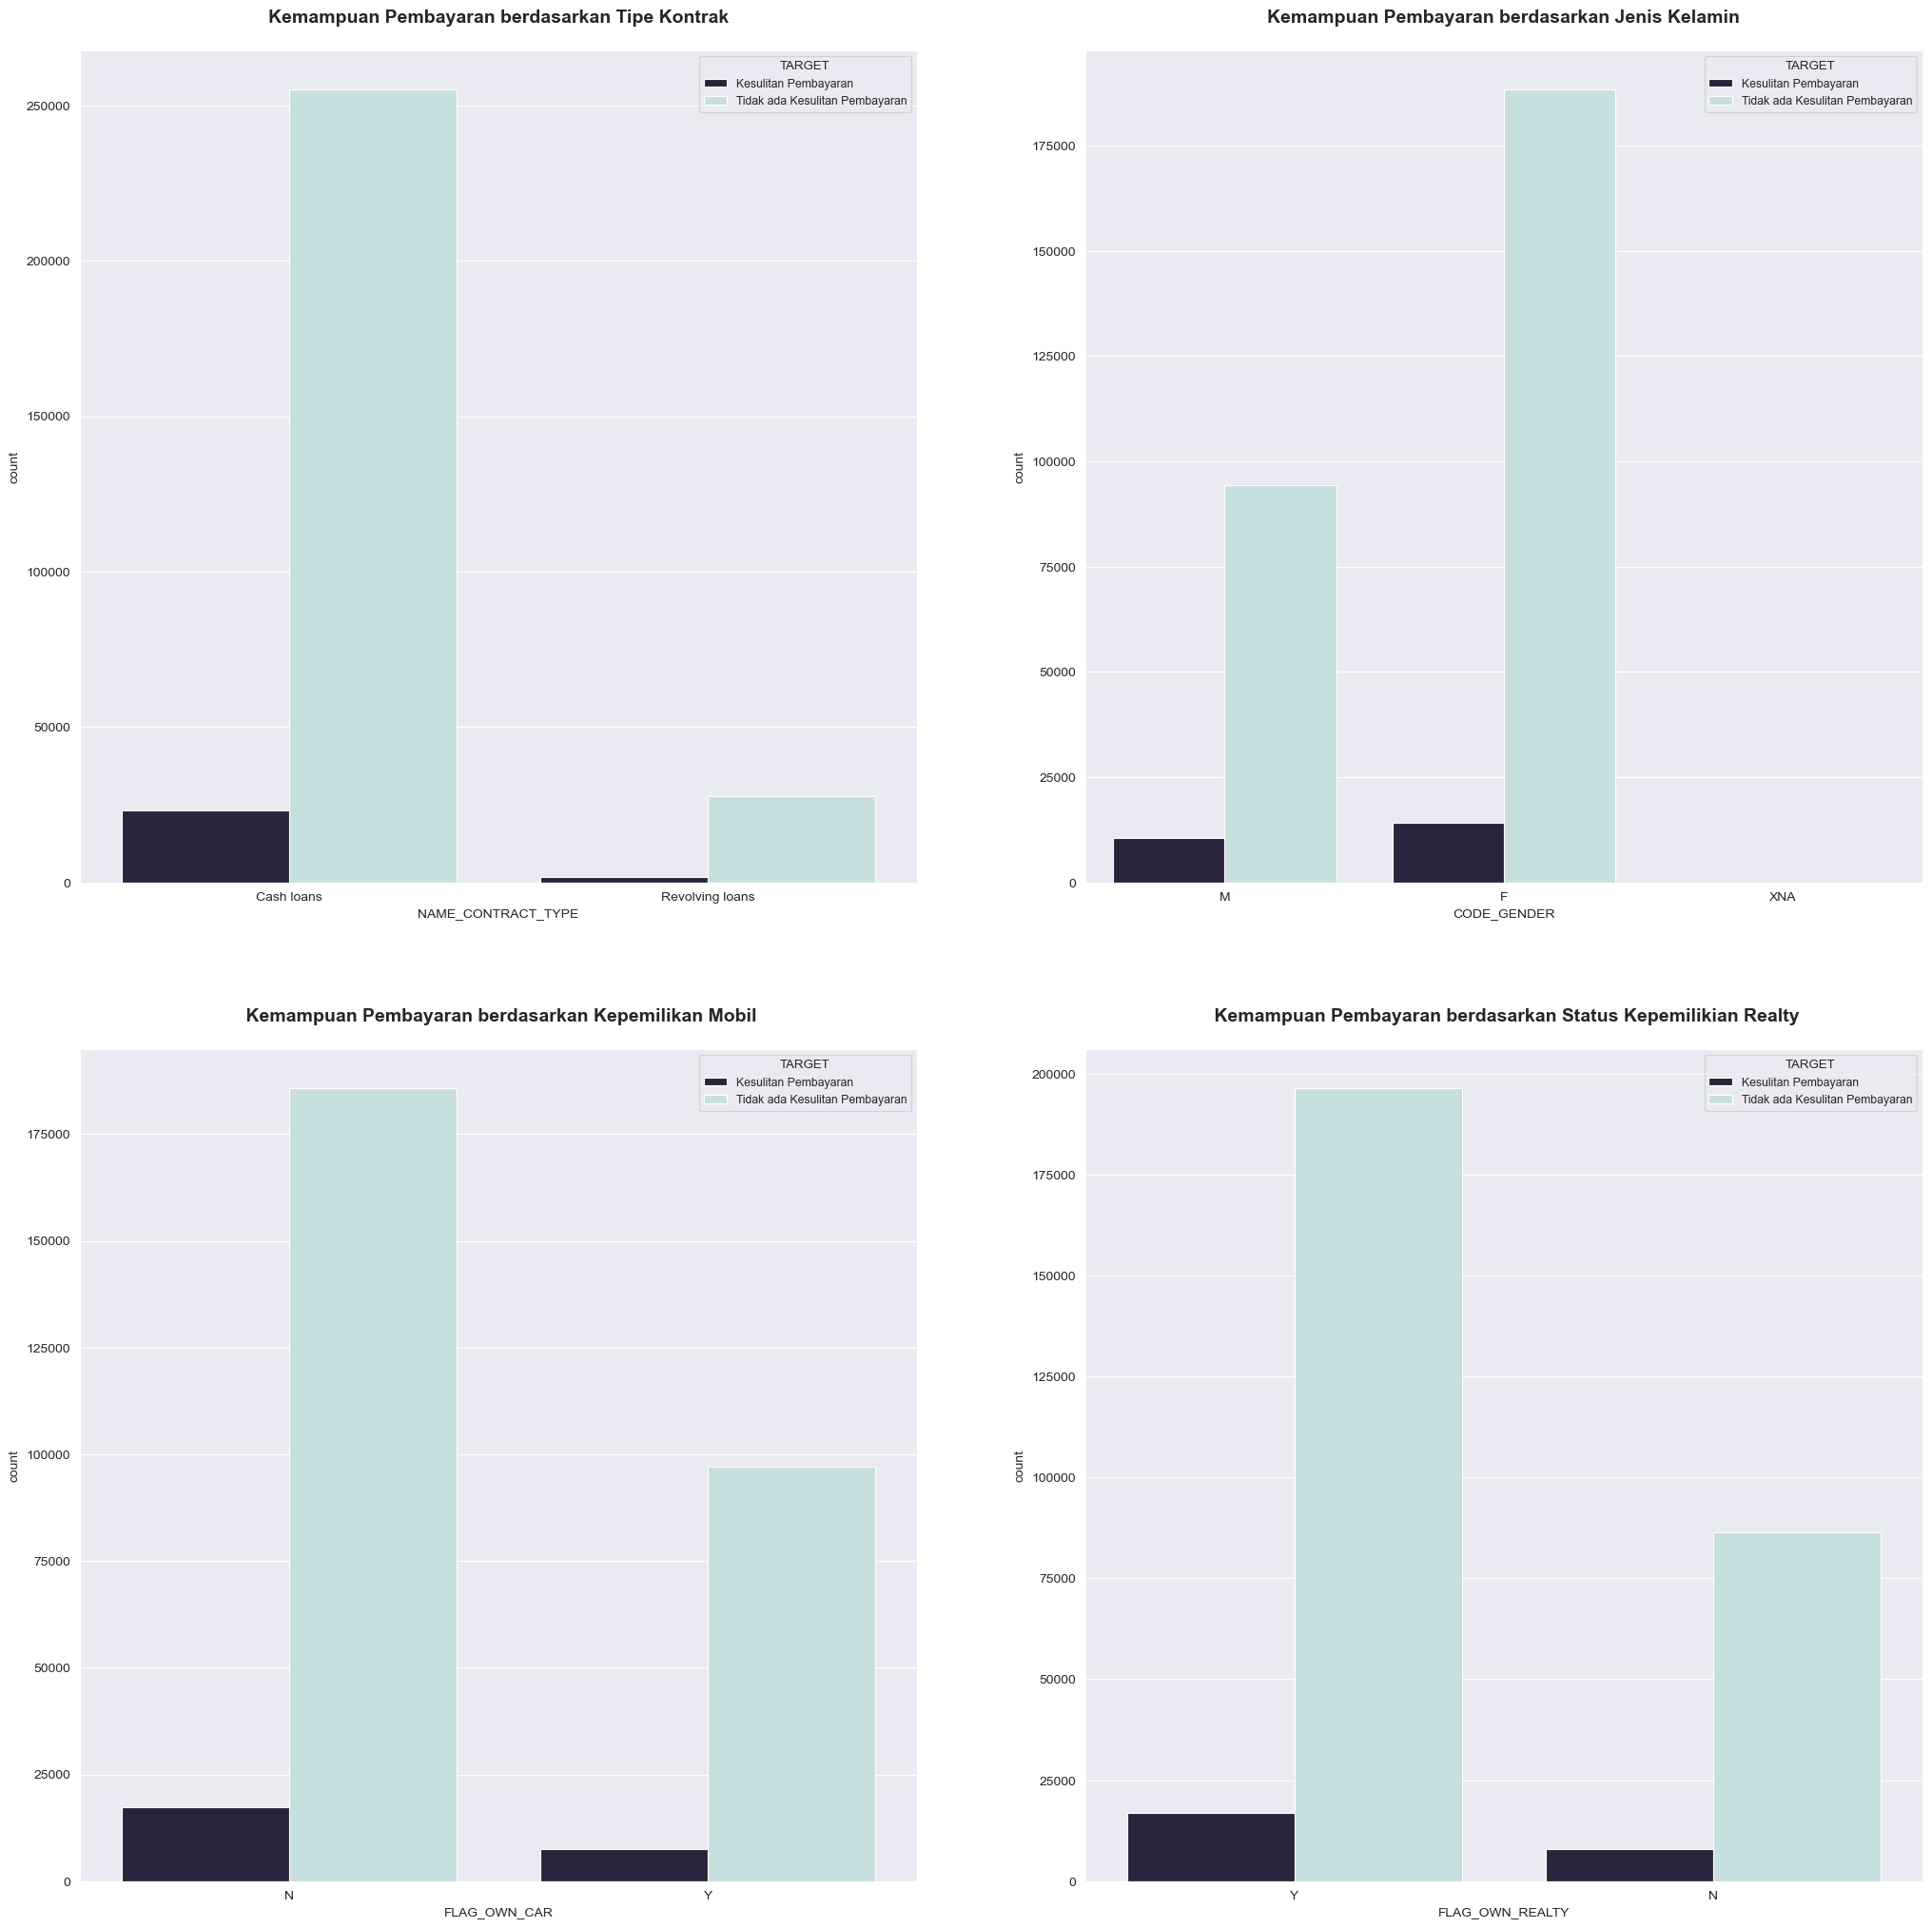

In [24]:
# Visualization 1
sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Kemampuan Pembayaran berdasarkan Tipe Kontrak\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Kemampuan Pembayaran berdasarkan Jenis Kelamin\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\n Kemampuan Pembayaran berdasarkan Kepemilikan Mobil\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\n Kemampuan Pembayaran berdasarkan Status Kepemilikian Realty\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

## Contract Type With Target

In [25]:
Contract_Type = train1.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran klien berdasarkan Contract_Type')
Contract_Type.sort_values(by='SK_ID_CURR', ascending=False)
Contract_Type.style.background_gradient(cmap='Blues')

Kemampuan Pembayaran klien berdasarkan Contract_Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,Kesulitan Pembayaran,23221
1,Cash loans,Tidak ada Kesulitan Pembayaran,255011
2,Revolving loans,Kesulitan Pembayaran,1604
3,Revolving loans,Tidak ada Kesulitan Pembayaran,27675


Pinjaman tunai dengan sekitar 278 ribu pinjaman merupakan mayoritas dari total pinjaman dalam kumpulan data ini. Pinjaman bergulir memiliki jumlah yang jauh lebih rendah sekitar 29 ribu dibandingkan dengan pinjaman tunai.

# Gender With Target

In [26]:
train1['CODE_GENDER'] = train1['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [27]:
gender = train1.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Jenis Kelamin (gender)')
gender.sort_values(by='SK_ID_CURR', ascending=False)
gender.style.background_gradient(cmap='Blues')

Kemampuan Pembayaran Klien Berdasarkan Jenis Kelamin (gender)


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,Kesulitan Pembayaran,14170
1,Female,Tidak ada Kesulitan Pembayaran,188278
2,Male,Kesulitan Pembayaran,10655
3,Male,Tidak ada Kesulitan Pembayaran,94404
4,XNA,Tidak ada Kesulitan Pembayaran,4


In [28]:
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


Dapat dilihat bahwa perempuan telah mengajukan sebagian besar pinjaman. Secara total, ada sekitar 202.448 aplikasi pinjaman yang diajukan oleh perempuan, dan sekitar 105.059 aplikasi diajukan oleh laki-laki.
Namun, persentase yang lebih besar (sekitar 10% dari total) laki-laki memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah perempuan (sekitar 7%).

# Car Ownership with Target

In [29]:
train1['FLAG_OWN_CAR'] = train1['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [30]:
ownership_type = train1.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Kepemilikan Mobil')
ownership_type.sort_values(by='SK_ID_CURR', ascending=False)
ownership_type.style.background_gradient(cmap='YlOrRd')

Kemampuan Pembayaran Klien Berdasarkan Kepemilikan Mobil


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,Kesulitan Pembayaran,17249
1,No,Tidak ada Kesulitan Pembayaran,185675
2,Yes,Kesulitan Pembayaran,7576
3,Yes,Tidak ada Kesulitan Pembayaran,97011


In [31]:
df_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


Sebagian besar klien tidak memiliki mobil.
Nasabah yang memiliki mobil (sekitar 8%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan dengan nasabah yang tidak memiliki mobil (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

# Realty Ownership Status VS Target

In [32]:
train1['FLAG_OWN_REALTY'] = train1['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

In [33]:
ros = train1.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Kepemilikan Realti')
ros.sort_values(by='SK_ID_CURR', ascending=False)
ros.style.background_gradient(cmap='RdPu')

Kemampuan Pembayaran Klien Berdasarkan Kepemilikan Realti


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,Kesulitan Pembayaran,7842
1,No,Tidak ada Kesulitan Pembayaran,86357
2,Yes,Kesulitan Pembayaran,16983
3,Yes,Tidak ada Kesulitan Pembayaran,196329


In [34]:
df_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


Sebagian besar klien memiliki flat / rumah.
Nasabah yang memiliki rumah/flat (sekitar 8%) mengalami kesulitan dalam pengembalian pinjaman dibandingkan nasabah yang tidak memiliki rumah/flat (sekitar 7%). Namun, perbedaannya tidak terlalu signifikan.

# Analysis Based On Suite Type, Income Type, Education Type, and Family Status

<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

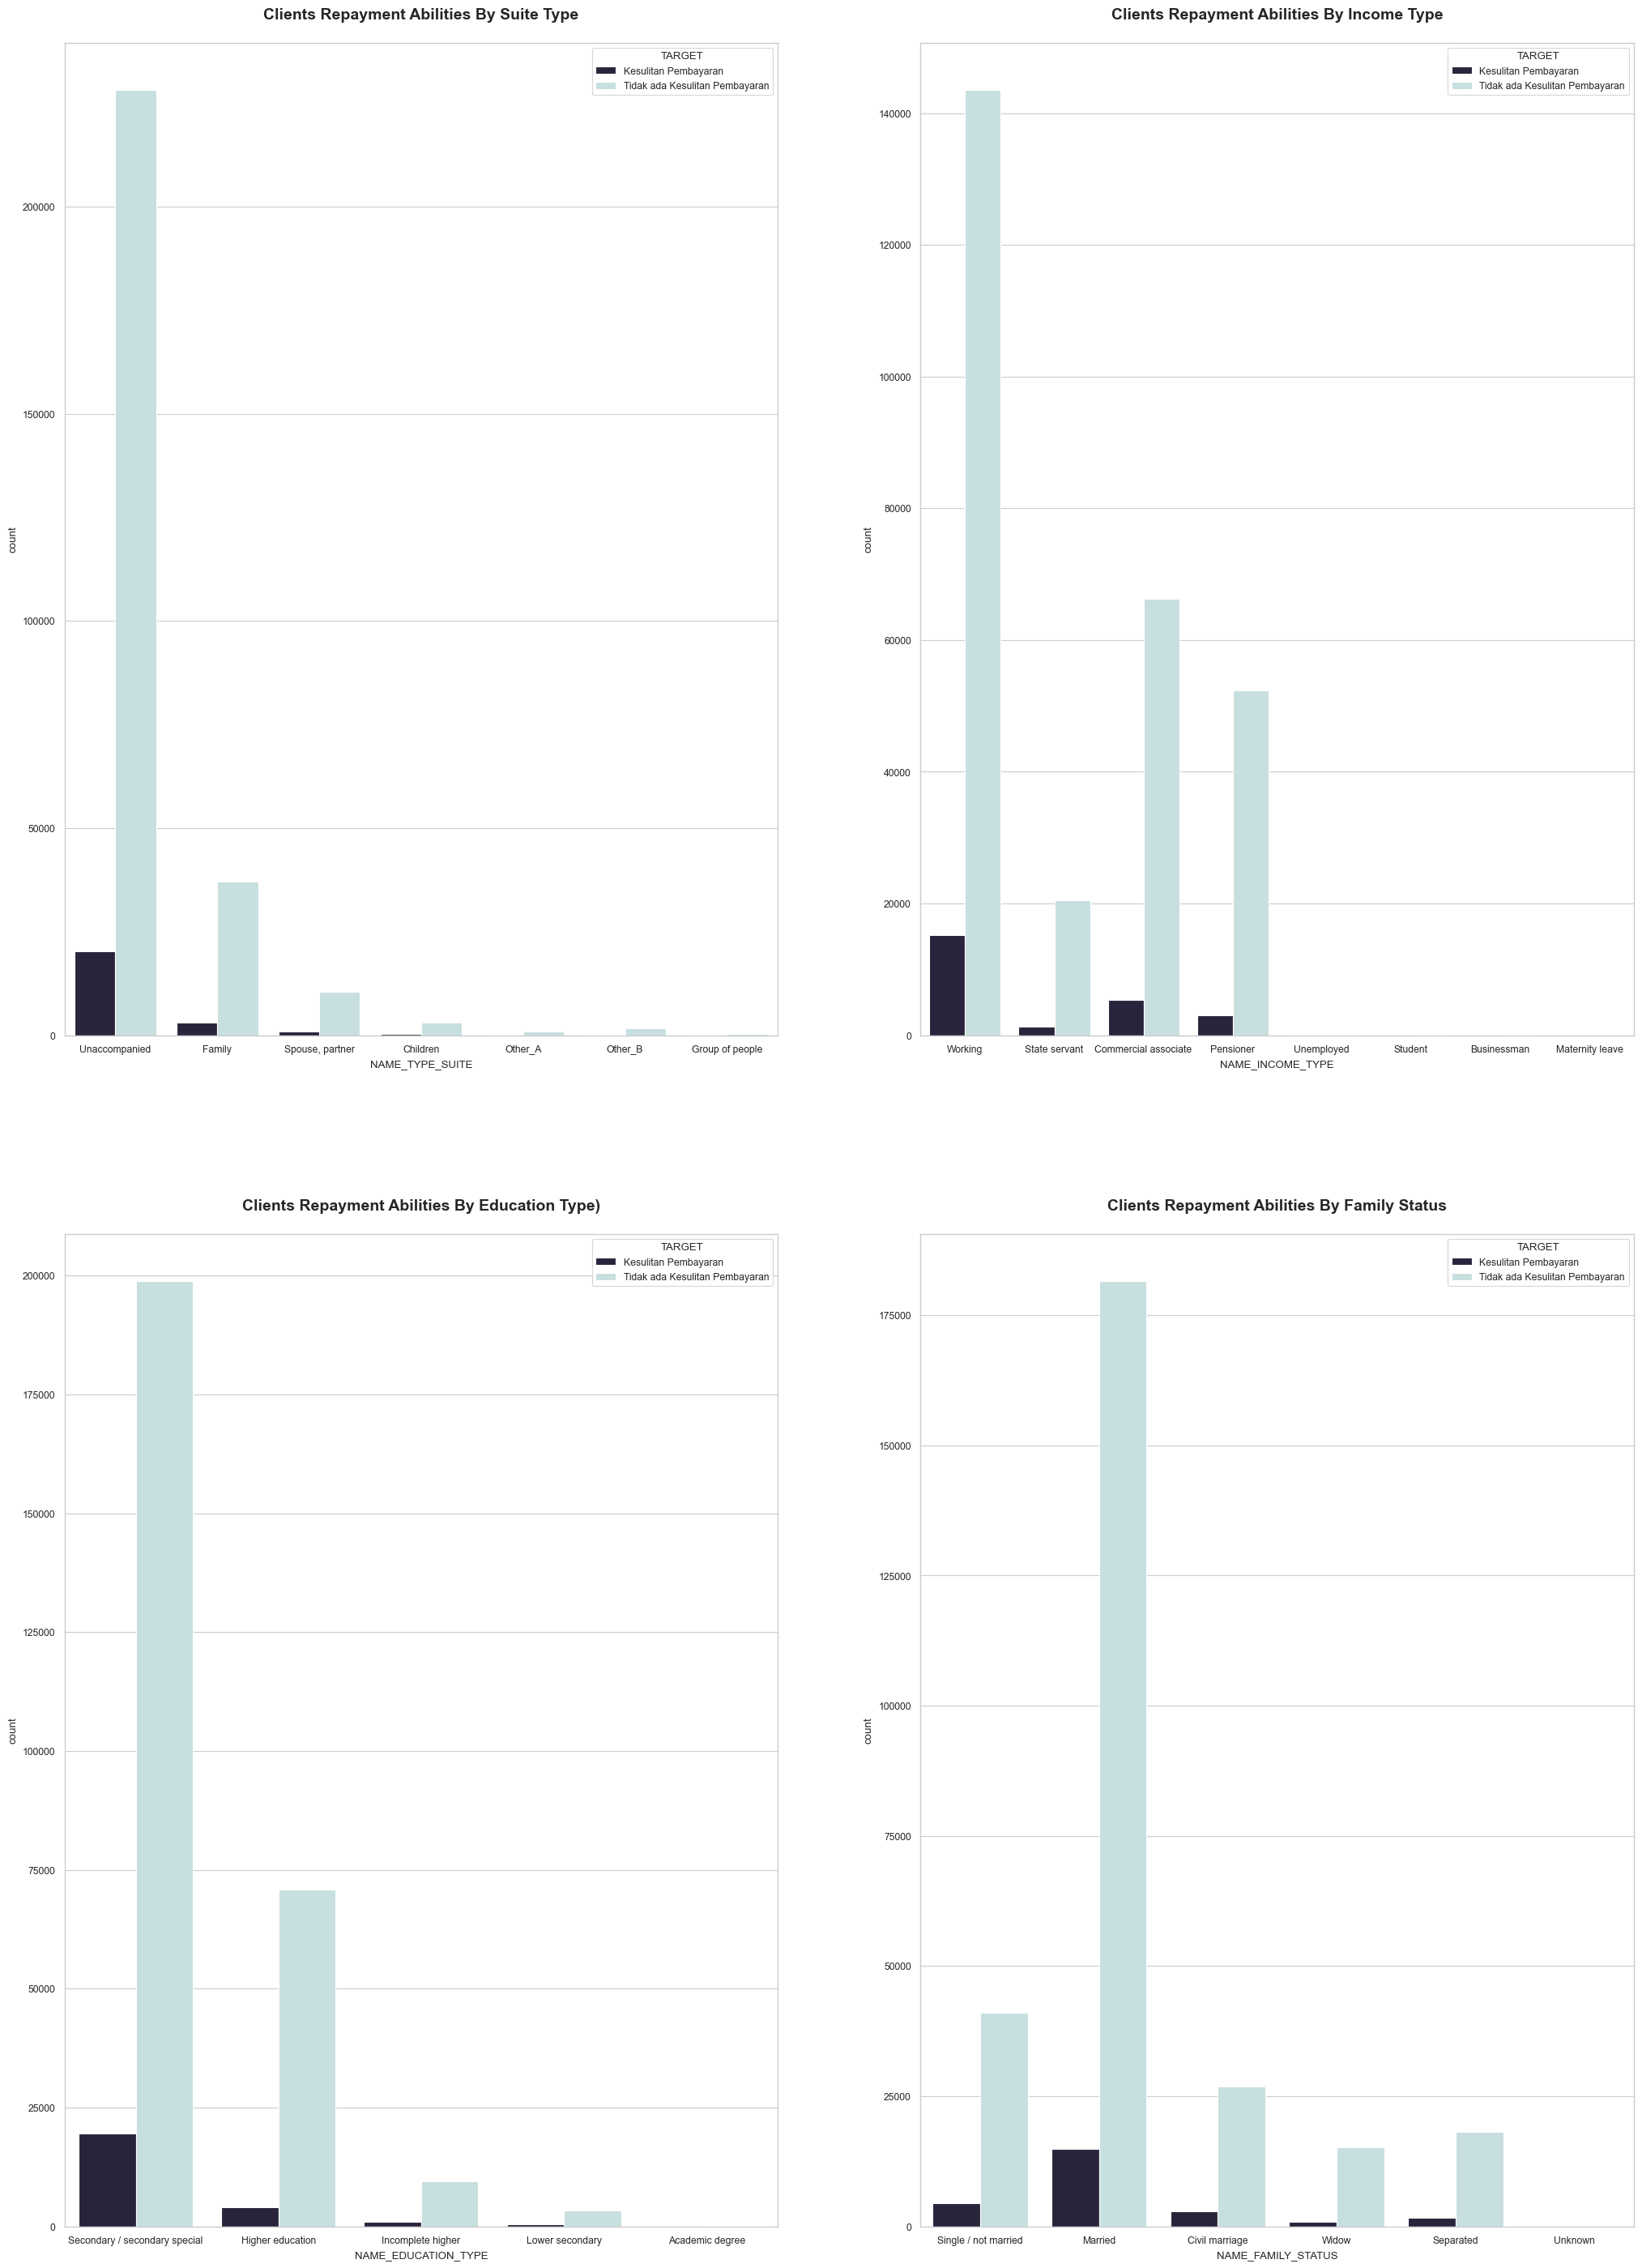

In [35]:
# visualization pt. 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

## Type Suite With Target

In [36]:
st = train1.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Suite')
st.sort_values(by='SK_ID_CURR', ascending=False)
st.style.background_gradient(cmap='Blues')

Kemampuan Pembayaran Klien Berdasarkan Tipe Suite


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,Kesulitan Pembayaran,241
1,Children,Tidak ada Kesulitan Pembayaran,3026
2,Family,Kesulitan Pembayaran,3009
3,Family,Tidak ada Kesulitan Pembayaran,37140
4,Group of people,Kesulitan Pembayaran,23
5,Group of people,Tidak ada Kesulitan Pembayaran,248
6,Other_A,Kesulitan Pembayaran,76
7,Other_A,Tidak ada Kesulitan Pembayaran,790
8,Other_B,Kesulitan Pembayaran,174
9,Other_B,Tidak ada Kesulitan Pembayaran,1596


In [37]:
df_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


Klien yang didampingi oleh Other_B saat mengajukan pinjaman memiliki persentase kesulitan pengembalian pinjaman yang lebih tinggi (sekitar 10%).

# Income Type With Target

In [38]:
income_type = train1.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Pendapatan')
income_type.sort_values(by='SK_ID_CURR', ascending=False)
income_type.style.background_gradient(cmap='Purples')

Kemampuan Pembayaran Klien Berdasarkan Tipe Pendapatan


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,Tidak ada Kesulitan Pembayaran,10
1,Commercial associate,Kesulitan Pembayaran,5360
2,Commercial associate,Tidak ada Kesulitan Pembayaran,66257
3,Maternity leave,Kesulitan Pembayaran,2
4,Maternity leave,Tidak ada Kesulitan Pembayaran,3
5,Pensioner,Kesulitan Pembayaran,2982
6,Pensioner,Tidak ada Kesulitan Pembayaran,52380
7,State servant,Kesulitan Pembayaran,1249
8,State servant,Tidak ada Kesulitan Pembayaran,20454
9,Student,Tidak ada Kesulitan Pembayaran,18


In [39]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


Dapat dilihat bahwa klien yang memiliki penghasilan bekerja telah mengajukan sebagian besar pinjaman, ada sekitar 158.774 aplikasi pinjaman.
Nasabah dengan jenis penghasilan pengusaha dan mahasiswa tidak mengalami kesulitan dalam mengembalikan pinjamannya.
Sedangkan klien dengan jenis penghasilan cuti hamil dan menganggur memiliki persentase tertinggi (sekitar 40% dan 36%) dengan TARGET = 1 yaitu. mengalami kendala dalam pengembalian pinjaman.

## Type Education with Target

In [40]:
education_type = train1.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Jenis Pendidikan')
education_type.sort_values(by='SK_ID_CURR')
education_type.style.background_gradient(cmap='Reds')

Kemampuan Pembayaran Klien Berdasarkan Jenis Pendidikan


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,Kesulitan Pembayaran,3
1,Academic degree,Tidak ada Kesulitan Pembayaran,161
2,Higher education,Kesulitan Pembayaran,4009
3,Higher education,Tidak ada Kesulitan Pembayaran,70854
4,Incomplete higher,Kesulitan Pembayaran,872
5,Incomplete higher,Tidak ada Kesulitan Pembayaran,9405
6,Lower secondary,Kesulitan Pembayaran,417
7,Lower secondary,Tidak ada Kesulitan Pembayaran,3399
8,Secondary / secondary special,Kesulitan Pembayaran,19524
9,Secondary / secondary special,Tidak ada Kesulitan Pembayaran,198867


In [41]:
df_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


Sejumlah besar aplikasi (218K) diajukan oleh klien yang memiliki pendidikan menengah diikuti oleh orang dengan pendidikan tinggi dengan aplikasi 75K.
Sedangkan klien dengan jenis pendidikan SMP memiliki persentase tertinggi (sekitar 10%) dari TARGET = 1 yaitu. mengalami Kesulitan dalam Pembayaran

# Family Status With Target

In [42]:
family = train1.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Status Keluarga')
family.sort_values(by='SK_ID_CURR', ascending=False)
family.style.background_gradient(cmap='Purples')

Kemampuan Pembayaran Klien Berdasarkan Status Keluarga


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,Kesulitan Pembayaran,2961
1,Civil marriage,Tidak ada Kesulitan Pembayaran,26814
2,Married,Kesulitan Pembayaran,14850
3,Married,Tidak ada Kesulitan Pembayaran,181582
4,Separated,Kesulitan Pembayaran,1620
5,Separated,Tidak ada Kesulitan Pembayaran,18150
6,Single / not married,Kesulitan Pembayaran,4457
7,Single / not married,Tidak ada Kesulitan Pembayaran,40987
8,Unknown,Tidak ada Kesulitan Pembayaran,2
9,Widow,Kesulitan Pembayaran,937


In [43]:
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


Dapat dilihat bahwa klien yang sudah menikah mengajukan sebagian besar pinjaman, ada sekitar 196.432 aplikasi pinjaman.
Klien dengan status keluarga perkawinan sipil dan lajang memiliki persentase tertinggi (sekitar 9%) dari klien yang bermasalah dalam mengembalikan pinjaman.

# Housing Type With Target

In [44]:
housing = train1.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan ')
housing.sort_values(by='SK_ID_CURR', ascending=False)
housing.style.background_gradient(cmap='Greens')

Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan 


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,Kesulitan Pembayaran,89
1,Co-op apartment,Tidak ada Kesulitan Pembayaran,1033
2,House / apartment,Kesulitan Pembayaran,21272
3,House / apartment,Tidak ada Kesulitan Pembayaran,251596
4,Municipal apartment,Kesulitan Pembayaran,955
5,Municipal apartment,Tidak ada Kesulitan Pembayaran,10228
6,Office apartment,Kesulitan Pembayaran,172
7,Office apartment,Tidak ada Kesulitan Pembayaran,2445
8,Rented apartment,Kesulitan Pembayaran,601
9,Rented apartment,Tidak ada Kesulitan Pembayaran,4280


In [45]:
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


Terlihat bahwa nasabah dengan tipe rumah apartemen sewa memiliki persentase kesulitan tertinggi (sekitar 12%) dalam kesulitan dalam melunasi pinjamannya.

Text(0.5, 1.0, 'Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan\n')

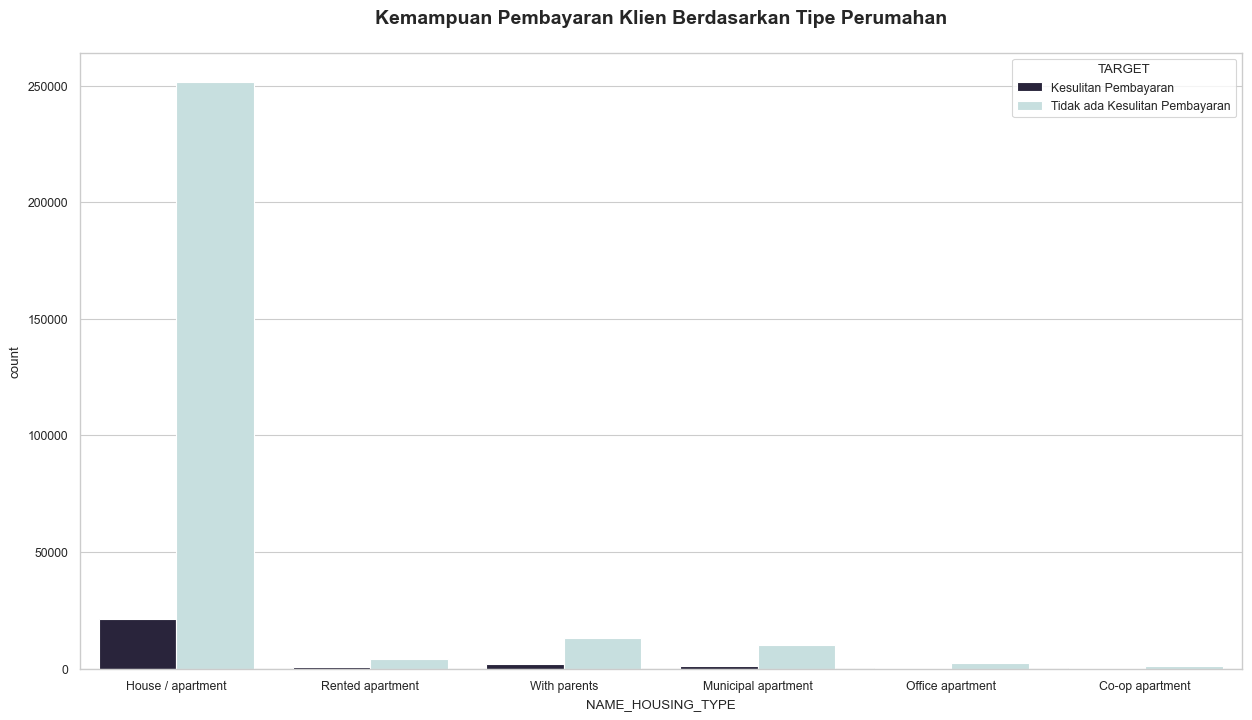

In [46]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Kemampuan Pembayaran Klien Berdasarkan Tipe Perumahan\n', fontweight='bold', fontsize=14)

Klien yang tinggal di House/Apartment memiliki jumlah tertinggi pada aplikasi pinjaman sekitar  250ribu keatas.

## Occupation Type With Target

In [47]:
occ = train1.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Tipe Pekerjaan')
occ.sort_values(by='SK_ID_CURR', ascending=False)
occ.style.background_gradient(cmap='Blues')

Kemampuan Pembayaran Klien Berdasarkan Tipe Pekerjaan


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,Kesulitan Pembayaran,474
1,Accountants,Tidak ada Kesulitan Pembayaran,9339
2,Cleaning staff,Kesulitan Pembayaran,447
3,Cleaning staff,Tidak ada Kesulitan Pembayaran,4206
4,Cooking staff,Kesulitan Pembayaran,621
5,Cooking staff,Tidak ada Kesulitan Pembayaran,5325
6,Core staff,Kesulitan Pembayaran,1738
7,Core staff,Tidak ada Kesulitan Pembayaran,25832
8,Drivers,Kesulitan Pembayaran,2107
9,Drivers,Tidak ada Kesulitan Pembayaran,16496


In [48]:
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


Sejumlah besar aplikasi (55K) diajukan oleh klien yang bekerja sebagai Buruh.
Terlihat bahwa klien dengan jenis pekerjaan Low-skill Laborers memiliki persentase tertinggi (sekitar 17%) dengan TARGET = 1 yaitu. mengalami kendala dalam pengembalian pinjaman.

## Process Day With Target

In [49]:
process_day = train1.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien Berdasarkan Proses Hari')
process_day.sort_values(by='SK_ID_CURR', ascending=False)
process_day.style.background_gradient(cmap='Blues')

Kemampuan Pembayaran Klien Berdasarkan Proses Hari


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,Kesulitan Pembayaran,4101
1,FRIDAY,Tidak ada Kesulitan Pembayaran,46237
2,MONDAY,Kesulitan Pembayaran,3934
3,MONDAY,Tidak ada Kesulitan Pembayaran,46780
4,SATURDAY,Kesulitan Pembayaran,2670
5,SATURDAY,Tidak ada Kesulitan Pembayaran,31182
6,SUNDAY,Kesulitan Pembayaran,1283
7,SUNDAY,Tidak ada Kesulitan Pembayaran,14898
8,THURSDAY,Kesulitan Pembayaran,4098
9,THURSDAY,Tidak ada Kesulitan Pembayaran,46493


In [50]:
df_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


Text(0.5, 0, '\nProcess Day')

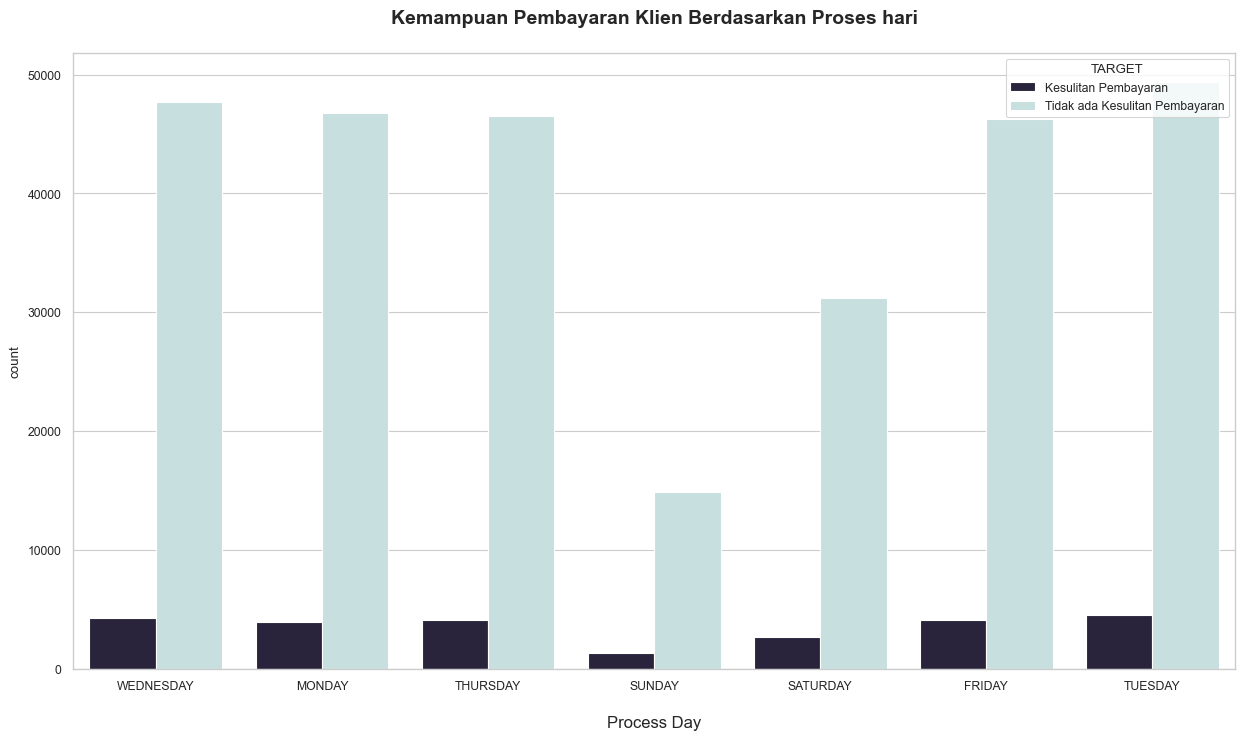

In [51]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = train1, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Kemampuan Pembayaran Klien Berdasarkan Proses hari\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

Terlihat bahwa setiap hari pengerjaan aplikasi memiliki persentase yang hampir sama (sekitar 7% - 8%) pada TARGET = 1 yaitu yang memiliki kesulitan pembyaran atau mengalami kendala dalam pengembalian pinjaman.

## Organization Type With Target

In [52]:
ot = train1.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Kemampuan Pembayaran Klien berdasarkan Suite Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Kemampuan Pembayaran Klien berdasarkan Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,Kesulitan Pembayaran,35
1,Advertising,Tidak ada Kesulitan Pembayaran,394
2,Agriculture,Kesulitan Pembayaran,257
3,Agriculture,Tidak ada Kesulitan Pembayaran,2197
4,Bank,Kesulitan Pembayaran,130
5,Bank,Tidak ada Kesulitan Pembayaran,2377
6,Business Entity Type 1,Kesulitan Pembayaran,487
7,Business Entity Type 1,Tidak ada Kesulitan Pembayaran,5497
8,Business Entity Type 2,Kesulitan Pembayaran,900
9,Business Entity Type 2,Tidak ada Kesulitan Pembayaran,9653


In [53]:
df_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


Dapat terlihat bahwa klien dengan tipe organisasi transportasi: type 3 memiliki persentase tertinggi (sekitar 15%) dari TARGET = 1 yaitu. mengalami kendala dalam pengembalian pinjaman.

# Bivariate : Numerical Features Vs Target

## AMT CREDIT WITH TARGET

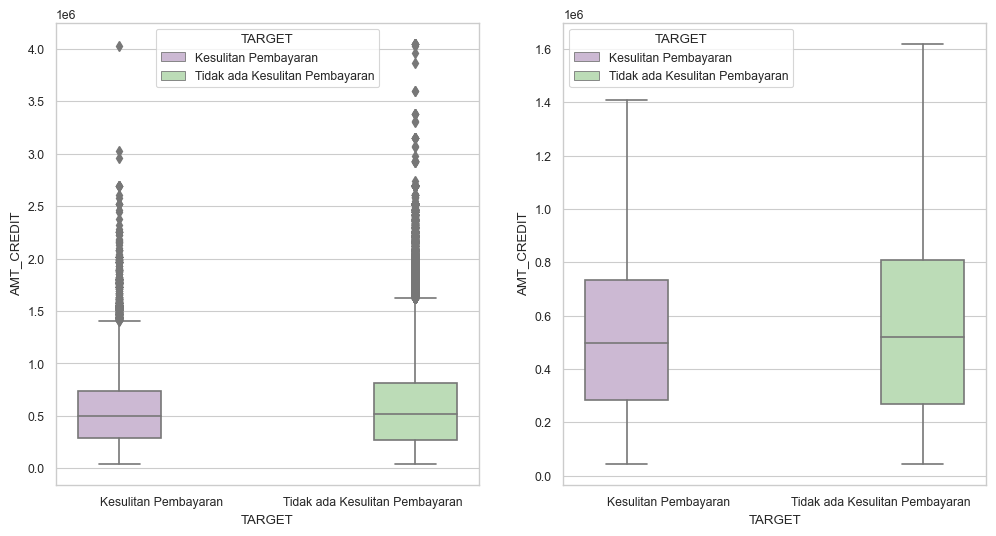

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x='TARGET', y='AMT_CREDIT', hue="TARGET",data=train1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x='TARGET', y='AMT_CREDIT', hue="TARGET",data=train1, palette="PRGn",showfliers=False)
plt.show();

Terlihat bahwa nilai median jumlah kredit klien yang tidak mengalami kesulitan pembayaran sedikit lebih besar dibandingkan dengan nilai median nasabah yang mengalami kesulitan pembayaran. Artinya, nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang yang sedikit lebih tinggi untuk mampu membayar kembali pinjamannya dibandingkan dengan nasabah dengan jumlah kredit yang lebih rendah.

# AMT INCOME WITH TARGET

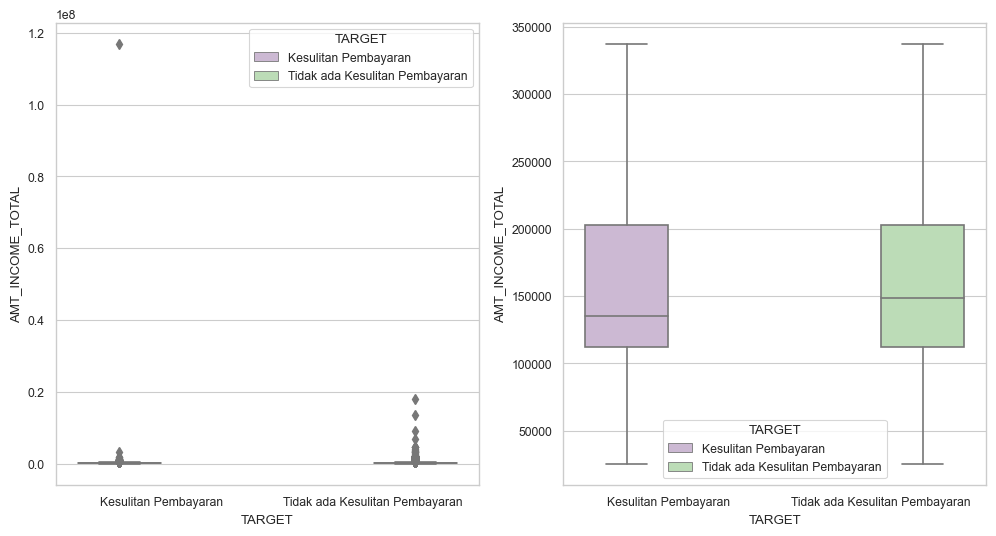

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x='TARGET', y='AMT_INCOME_TOTAL', hue="TARGET",data=train1, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x='TARGET', y='AMT_INCOME_TOTAL', hue="TARGET",data=train1, palette="PRGn",showfliers=False)
plt.show();

Terlihat bahwa baik klien yang mengalami kesulitan pembayaran maupun klien yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. Namun, dengan meningkatnya pendapatan klien, kemungkinan bahwa klien tidak akan mengalami kesulitan membayar kembali pinjaman juga meningkat.

# Age With Target

In [56]:
N_age = df_train[df_train['TARGET']==0]['DAYS_BIRTH'].values/-365
Y_age = df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365

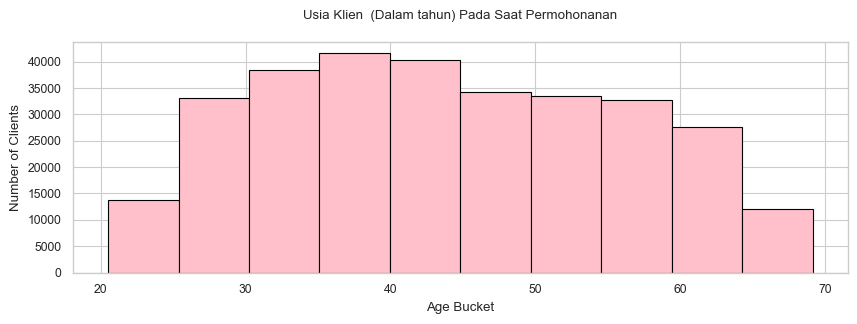

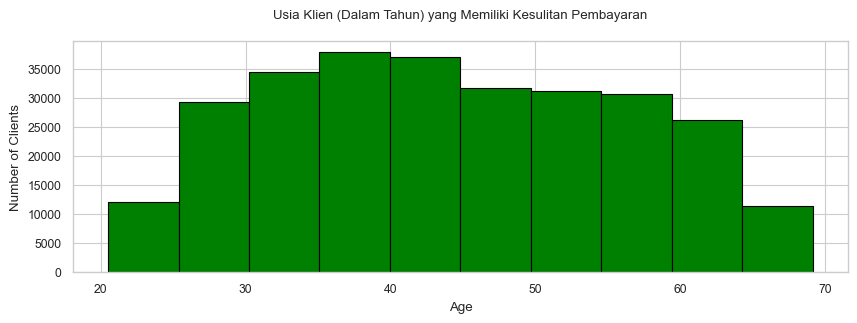

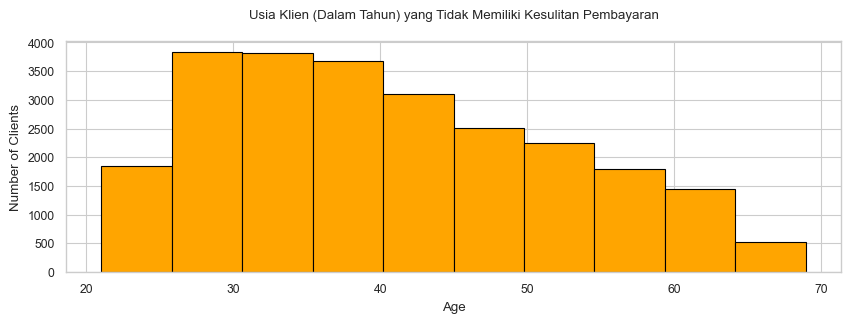

In [57]:
plt.figure(figsize=(10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='Pink')
plt.title('Usia Klien  (Dalam tahun) Pada Saat Permohonanan\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(N_age, bins=10, edgecolor='black', color='green')
plt.title('Usia Klien (Dalam Tahun) yang Memiliki Kesulitan Pembayaran\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(Y_age, bins=10, edgecolor='black', color='orange')
plt.title('Usia Klien (Dalam Tahun) yang Tidak Memiliki Kesulitan Pembayaran\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar nasabah yang mengajukan pinjaman berada pada rentang usia 35-40 tahun, diikuti nasabah pada rentang usia 40-45 tahun. Sementara itu, jumlah pelamar untuk klien berusia <25 tahun atau usia >65 tahun sangat rendah.
Klien yang tidak mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Sedangkan nasabah yang mengalami kesulitan pembayaran adalah nasabah dengan rentang usia 25-35 tahun.

# MULTIVARIAT VISUALIZATION

### A. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

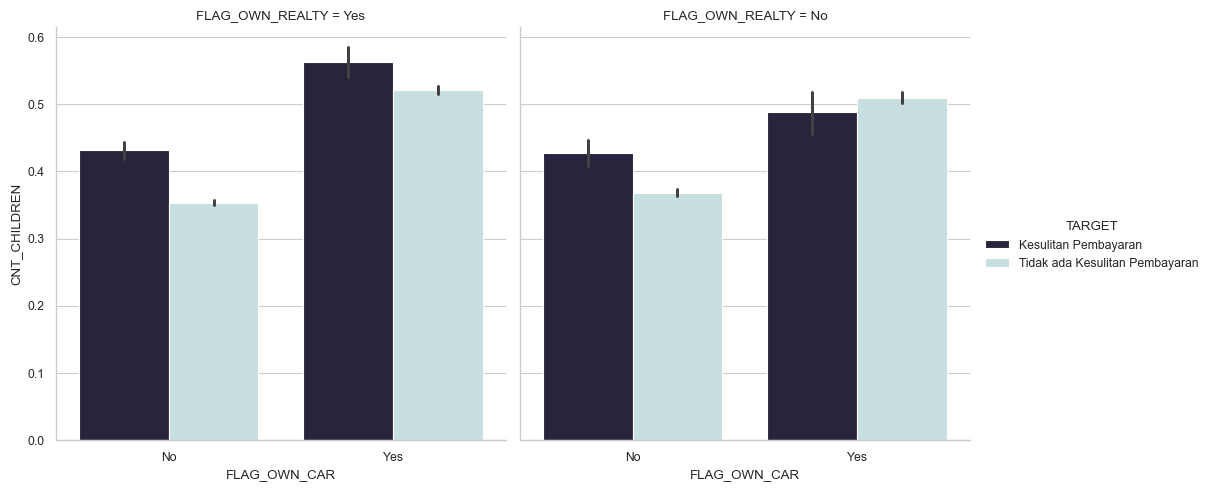

In [58]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)
plt.show()

Klien yang memiliki mobil dan rumah/flat memiliki masalah dalam mengembalikan pinjaman untuk jumlah anak yang tinggi dibandingkan dengan klien yang tidak memiliki rumah/flat.

###  B. Income Type, Amount of Annuaty, Target, and House/Flat Ownership Status

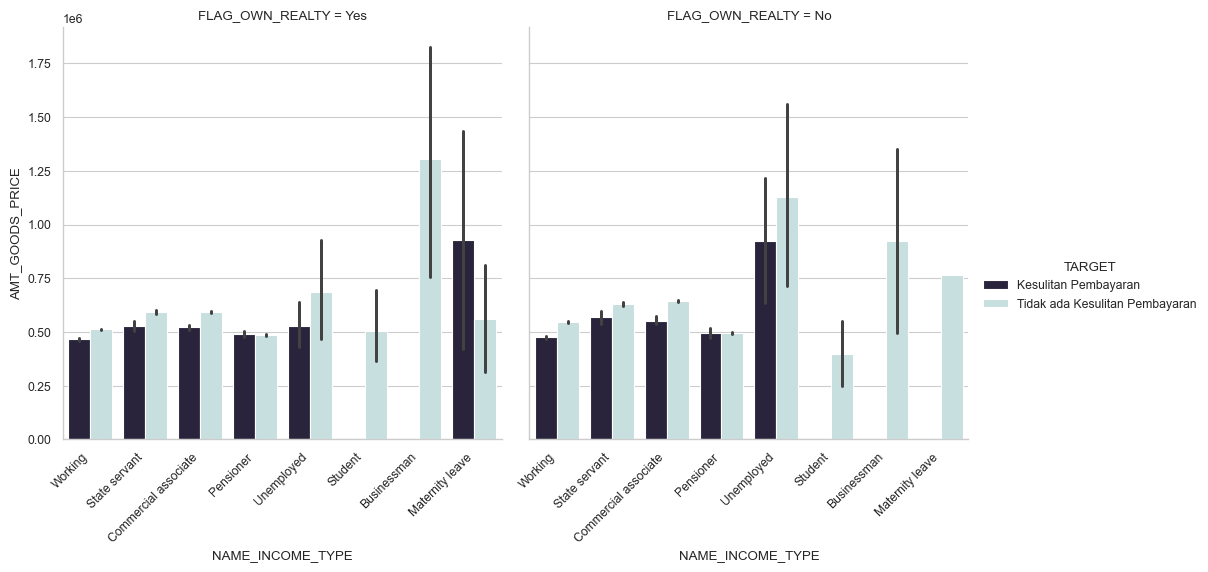

In [59]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien dengan jenis penghasilan cuti hamil (Maternity Leave) di FLAG_OWN_REALTY = Yes (yaitu memiliki rumah/flat) memiliki masalah dalam membayar pinjaman dibandingkan ketika FLAG_OWN_REALTY = No (yaitu tidak memiliki rumah/flat).

###  C. Family Status, Amount of Income, Target, and House/Flat Ownership Status

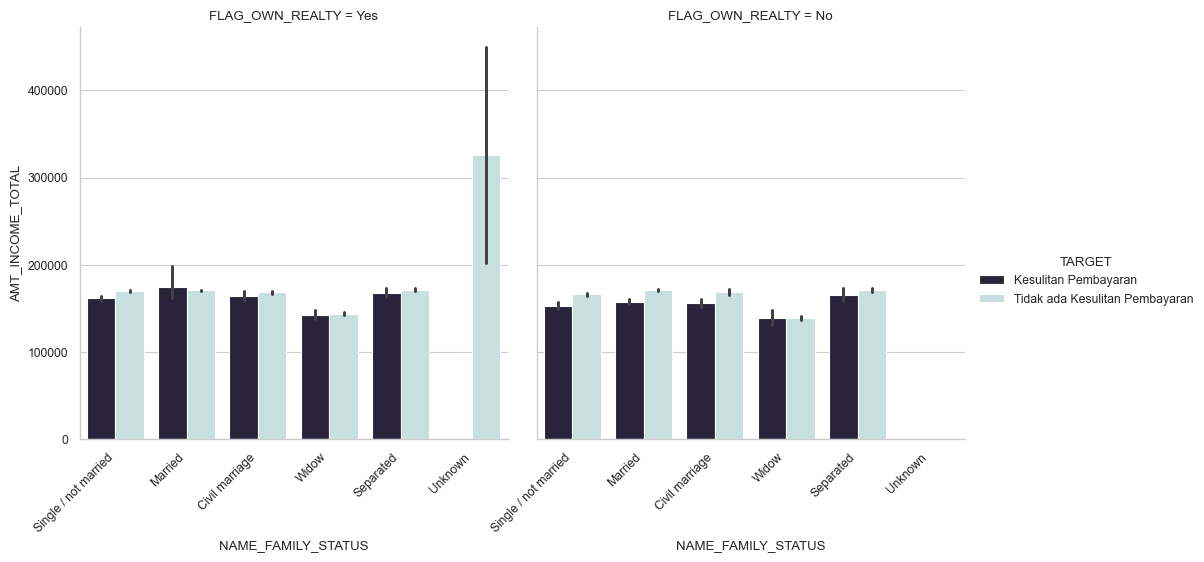

In [60]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL', 
                  hue = 'TARGET', 
                  col = 'FLAG_OWN_REALTY', 
                  kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
                  data = train1)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang sudah menikah dan memiliki rumah/flat (FLAG_OWN_REALTY = Yes) memiliki masalah dalam membayar kembali pinjaman dengan pendapatan menengah dibandingkan dengan saat klien tidak memiliki rumah/flat (FLAG_OWN_REALTY = No).

#### Kelompok Berdasarkan Ownership Status

### A.Contract Type, The Number of Children, Target, and Car Ownership Status

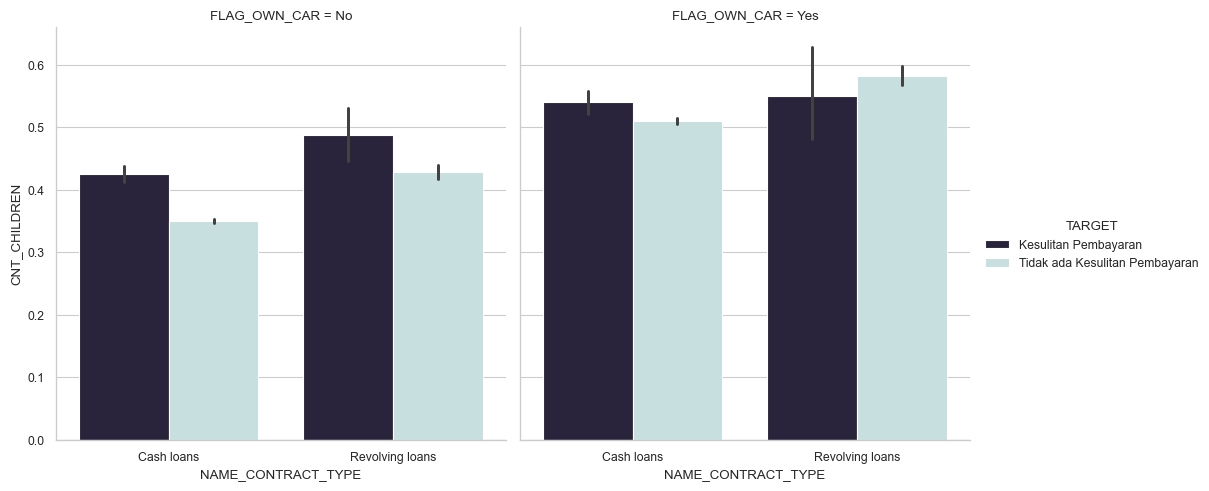

In [61]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)
plt.show()

Untuk pinjaman bergulir di FLAG_OWN_CAR = Tidak (yaitu tidak memiliki mobil) memiliki masalah dalam membayar kembali pinjaman dibandingkan ketika FLAG_OWN_CAR = Ya (yaitu memiliki mobil).

#### Kelompok Berdasarkan Contract Type

### A.Income Type, Amount of Credit, Target, and Contract Type

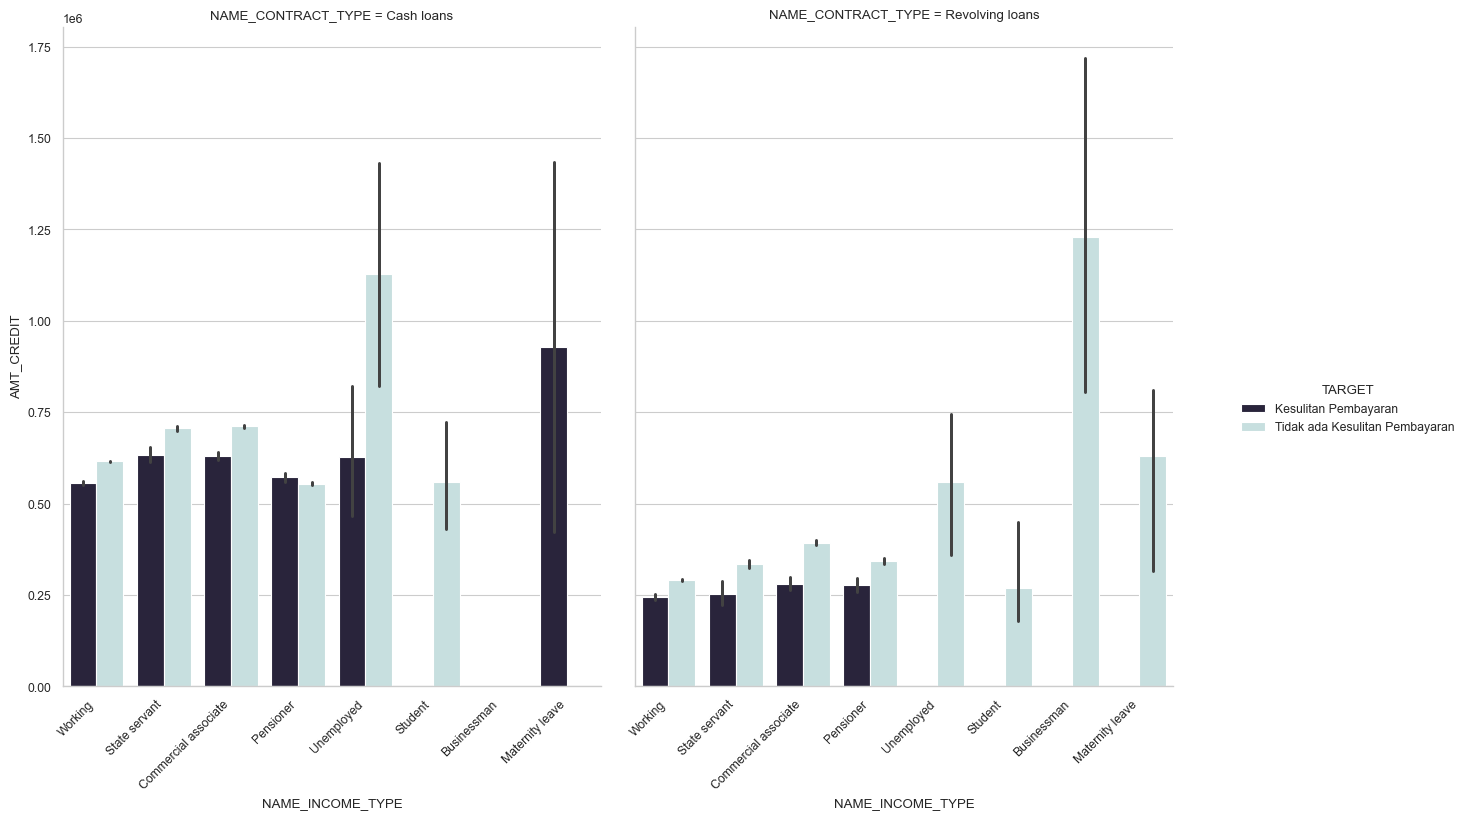

In [62]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

Untuk jenis pendapatan cuti hamil dengan pinjaman tunai, semua klien memiliki masalah dalam membayar kembali pinjaman dengan jumlah pinjaman sedang. Sementara semua klien dengan cuti hamil dan pinjaman bergulir tidak mengalami kesulitan untuk mengembalikan pinjaman.
Untuk klien yang menganggur dengan pinjaman tunai, lebih dari 50% klien memiliki masalah dalam membayar kembali pinjaman dengan jumlah kredit menengah dari pinjaman tersebut. Sementara semua klien yang menganggur dengan pinjaman bergulir tidak mengalami kesulitan untuk mengembalikan pinjaman.
Semua klien siswa tidak mengalami kesulitan untuk membayar kembali pinjaman baik dengan pinjaman tunai atau pinjaman bergulir dengan jumlah pinjaman kredit rendah hingga menengah.

#### Kelompok berdasarkan Rating of Region where Client Lives

### A. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

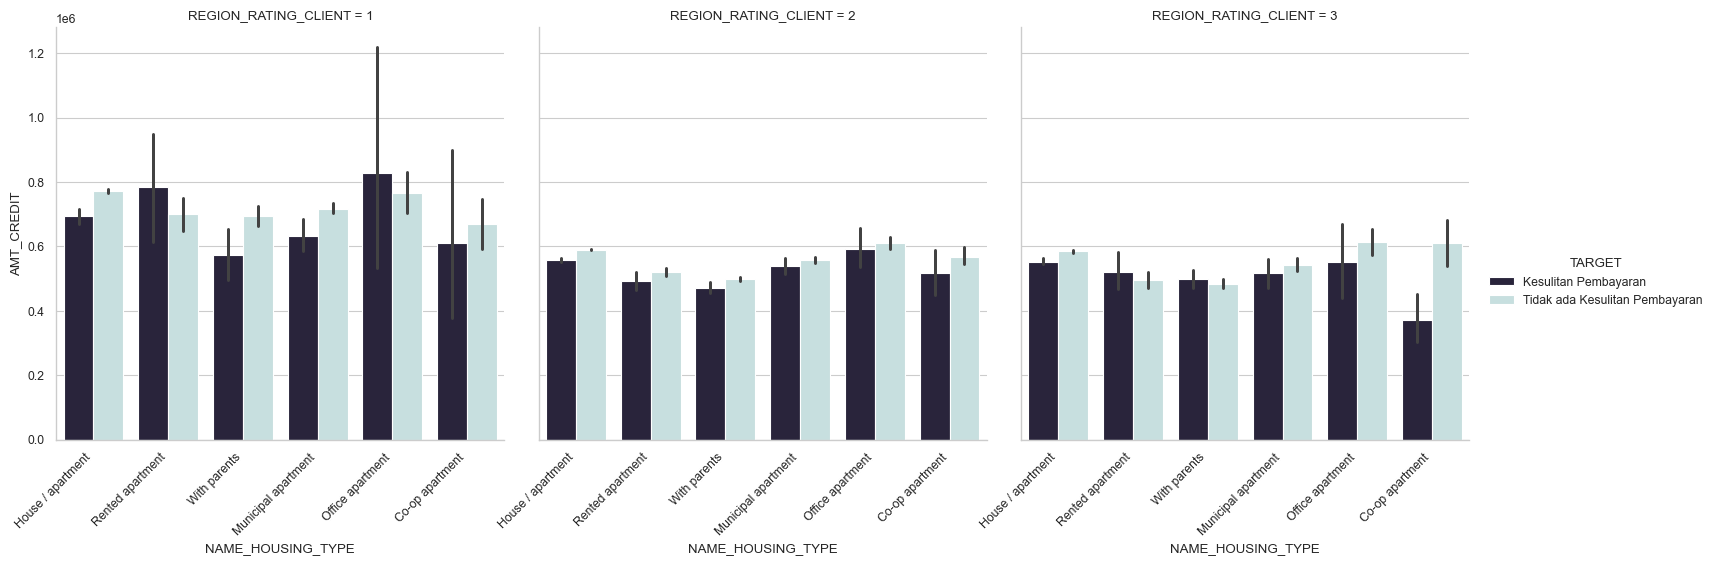

In [63]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang tinggal di apartemen sewaan dan apartemen kantor dan wilayahnya memiliki peringkat 1, memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan klien di wilayah dengan peringkat 2 untuk jumlah pinjaman kredit sedang.

### B. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

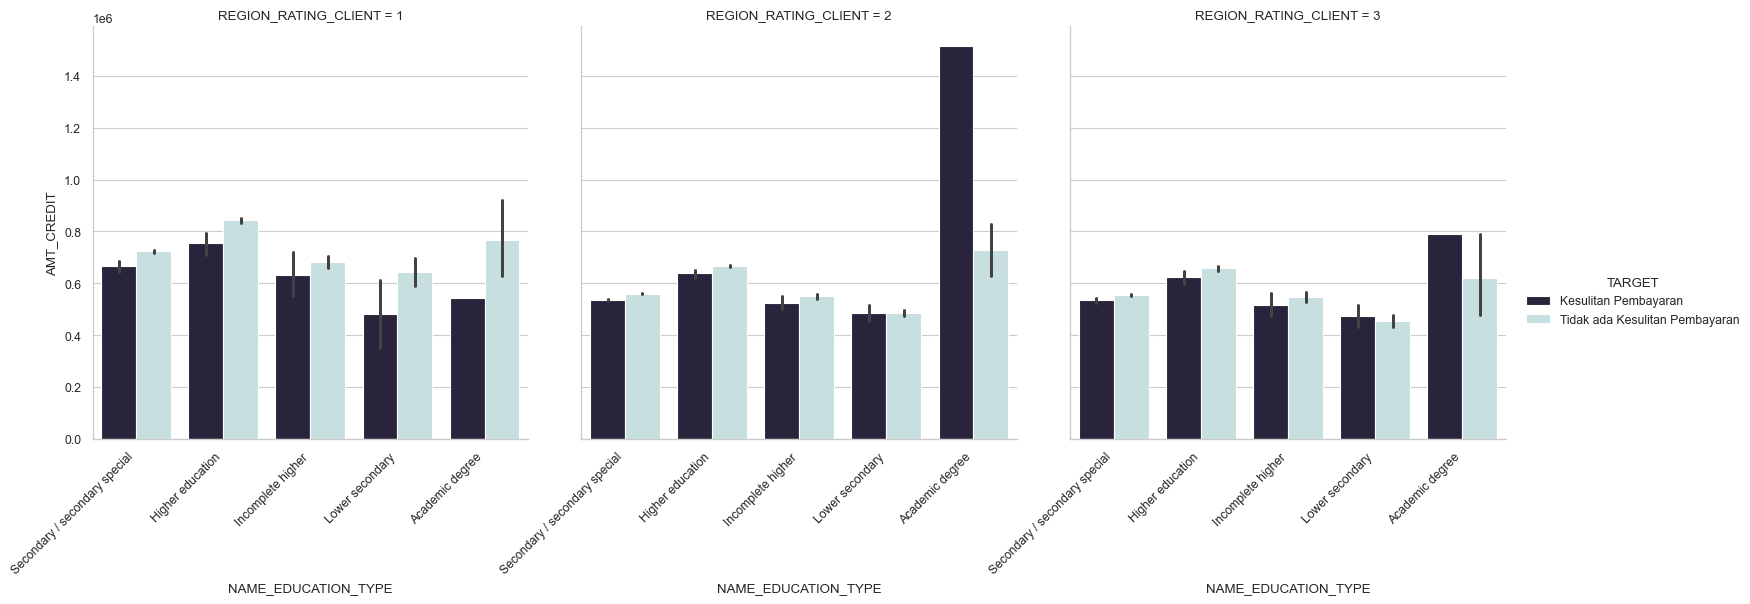

In [64]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk klien yang memiliki gelar akademik dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang lebih tinggi. Dan, klien dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar pinjaman untuk kredit pinjaman dalam jumlah sedang.

### C.  Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

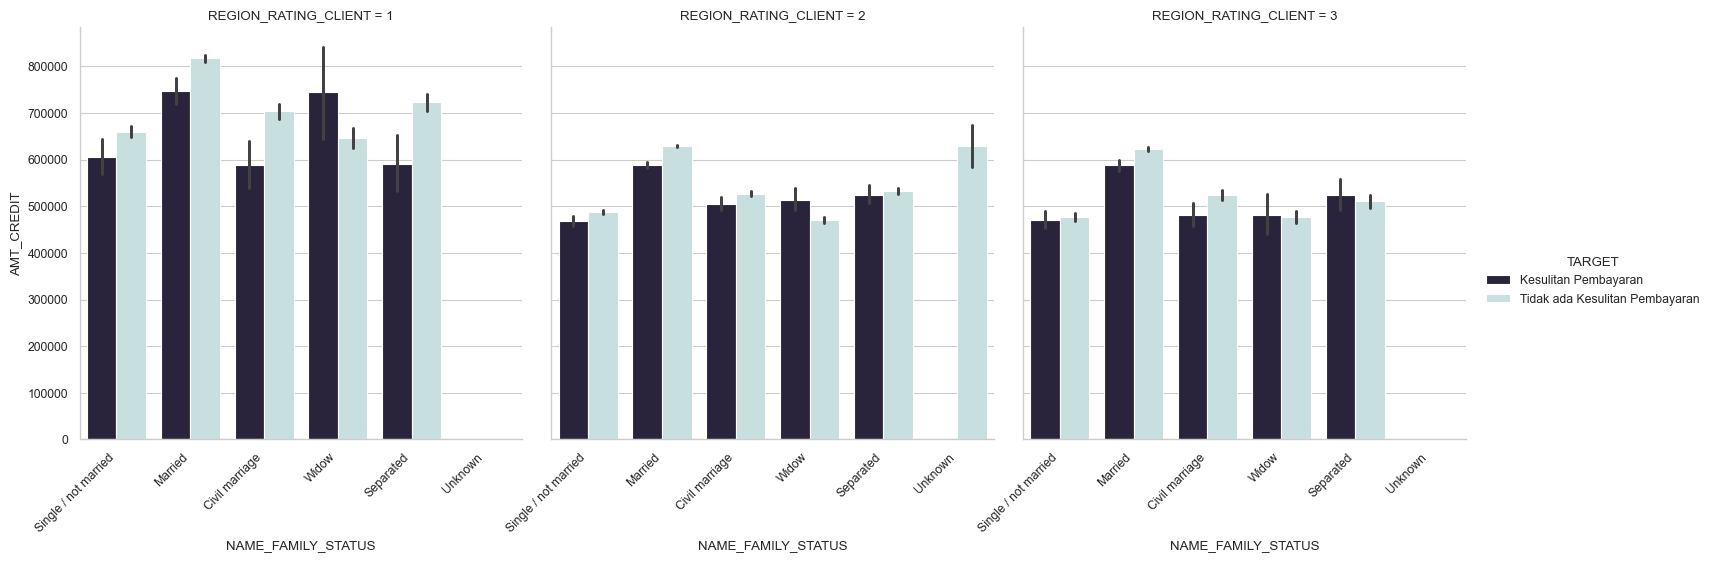

In [65]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train1)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang berstatus keluarga janda, baik yang tinggal di daerah dengan rating 1, 2, atau 3, mengalami kesulitan dalam mengembalikan pinjaman untuk kredit pinjaman dalam jumlah sedang hingga tinggi.
Klien yang memiliki status keluarga terpisah, dan tinggal di daerah dengan peringkat 3, memiliki masalah dalam membayar pinjaman dengan jumlah kredit pinjaman yang moderat dibandingkan dengan klien yang tinggal di daerah dengan peringkat 1 atau 2.

# Data Cleaning

### Detecting Data Duplication

In [66]:
print('Banyaknya Duplikasi adalah:', df_train.duplicated().sum())
# there is no duplication

Banyaknya Duplikasi adalah: 0


### Detecting Missing Values

In [67]:
# checking for empty elements
print('Missing values status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


,index,Total Null Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [68]:
# Drop features that have large number of missing values (± 50%)
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [69]:
# after drop some features
print('Status Missing Value:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Status Missing Value: True


,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\1079088997.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\1079088997.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_C

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

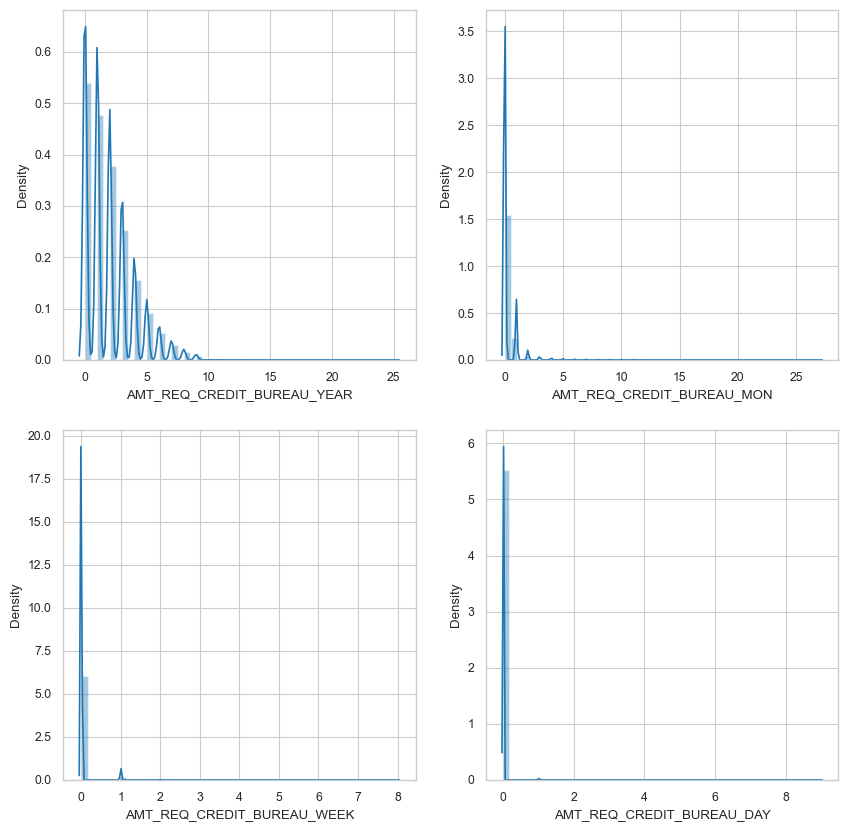

In [70]:
# distribution of numerical features that have missing values part.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\923383018.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\923383018.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CRE

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

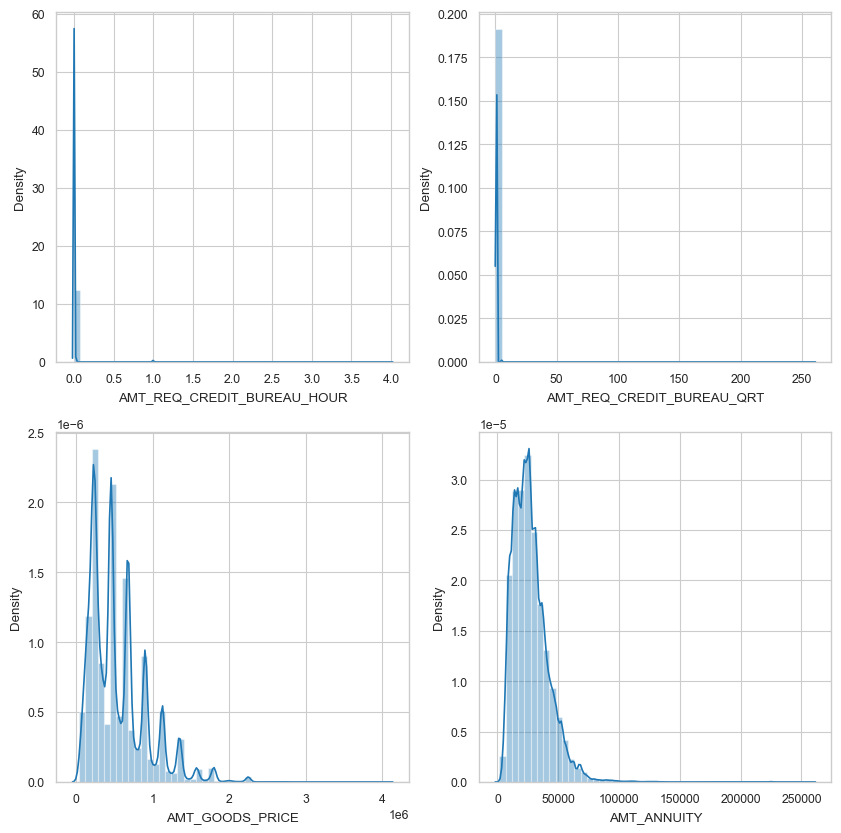

In [71]:
# distribution of numerical features that have missing values part.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])

sns.distplot(df_train['AMT_GOODS_PRICE'], ax=ax[1][0])

sns.distplot(df_train['AMT_ANNUITY'], ax=ax[1][1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\3110992637.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\3110992637.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['OBS_60_CNT_

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

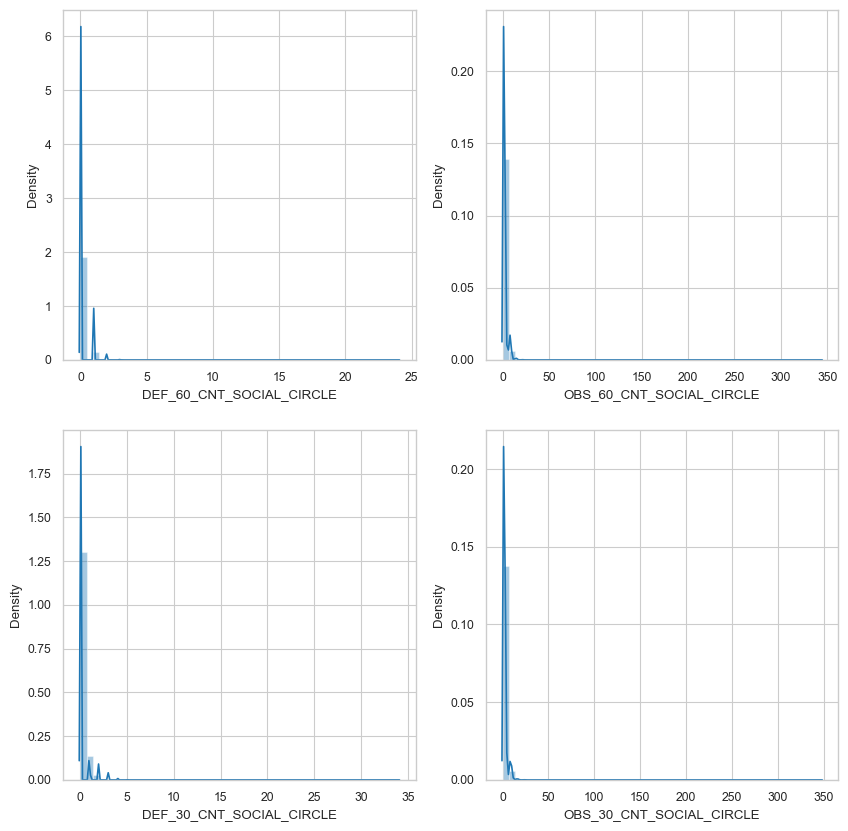

In [72]:
# distribution of numerical features that have missing values part 3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\3178645962.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13120\3178645962.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'

<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

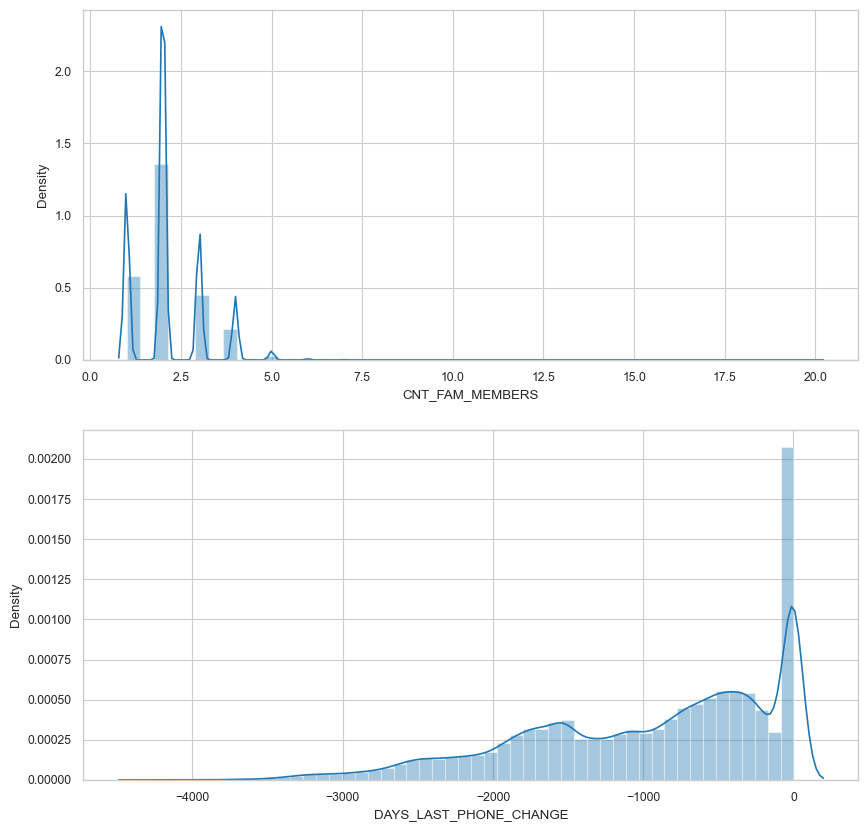

In [73]:
# distribution of numerical features that have missing values part.4
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

Terlihat bahwa sebaran fitur numerik yang disebutkan di atas miring, sehingga nilai yang hilang pada fitur tersebut akan diperhitungkan dengan median.

In [74]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [75]:
# after imputation
print('Status Missing Value:', df_train.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Status Missing Value: False

The number of missing values for each columns (after imputation): 



,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
5,NAME_CONTRACT_TYPE,0,0.0
6,CODE_GENDER,0,0.0
7,FLAG_OWN_CAR,0,0.0
8,FLAG_OWN_REALTY,0,0.0
9,CNT_CHILDREN,0,0.0


## Detecting Outliers

In [76]:
# dataset that only consist numerical features part.1
int_features = df_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

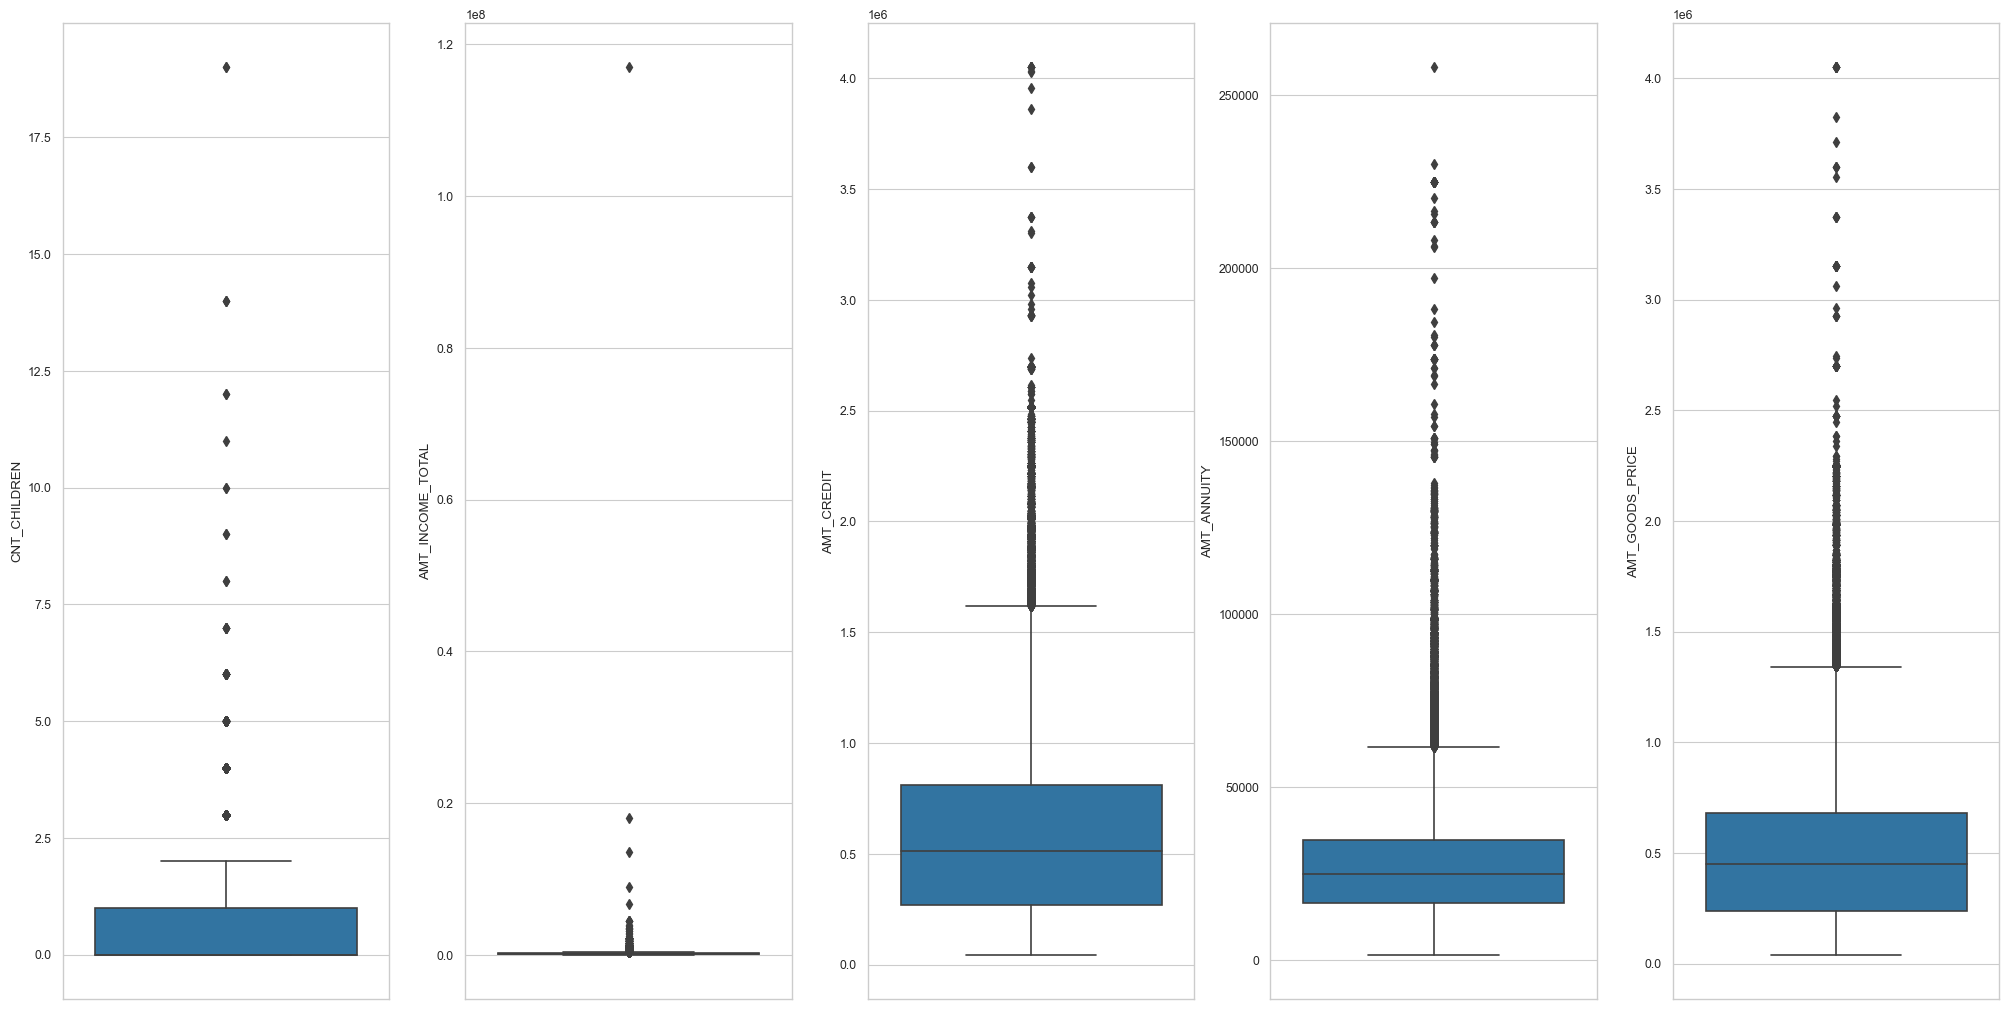

In [77]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [78]:
# dataset that only consist numerical features part.2
int_features = df_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

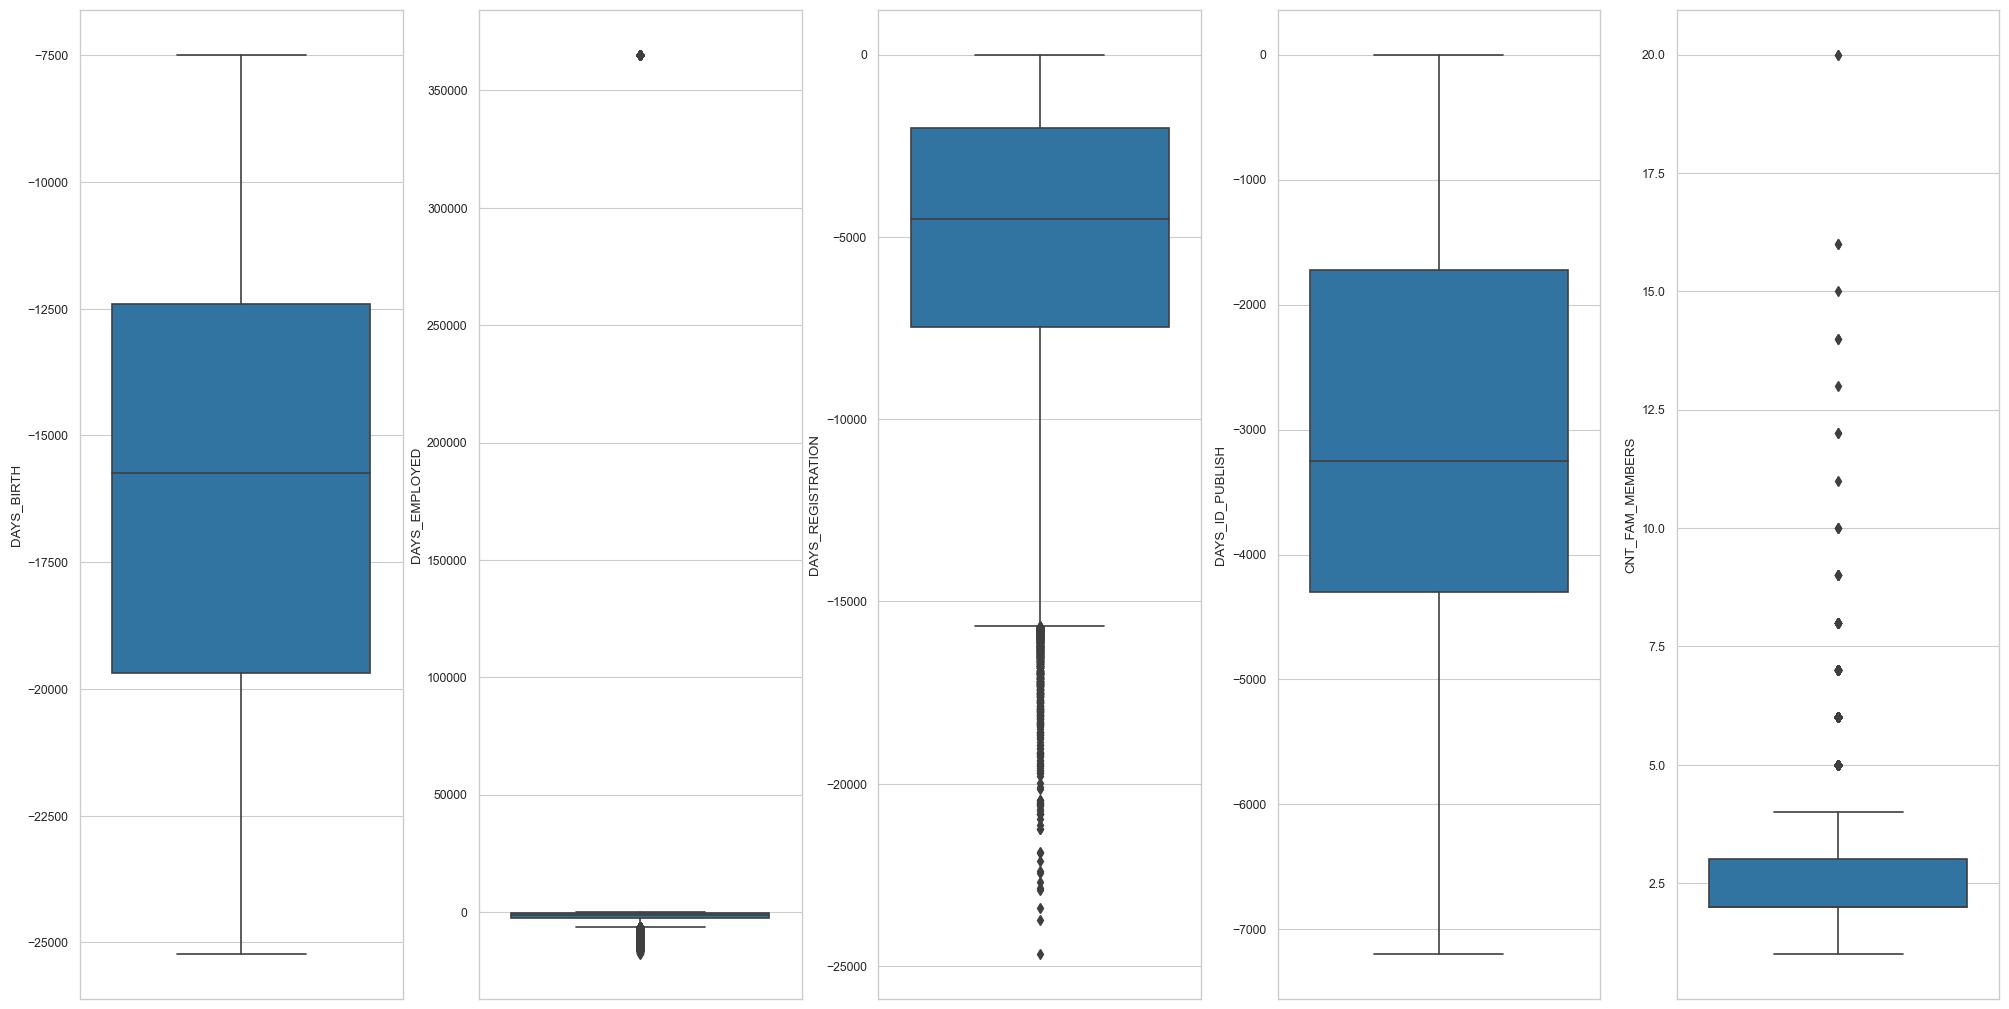

In [79]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [80]:
# dataset that only consist numerical features part.3
int_features = df_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

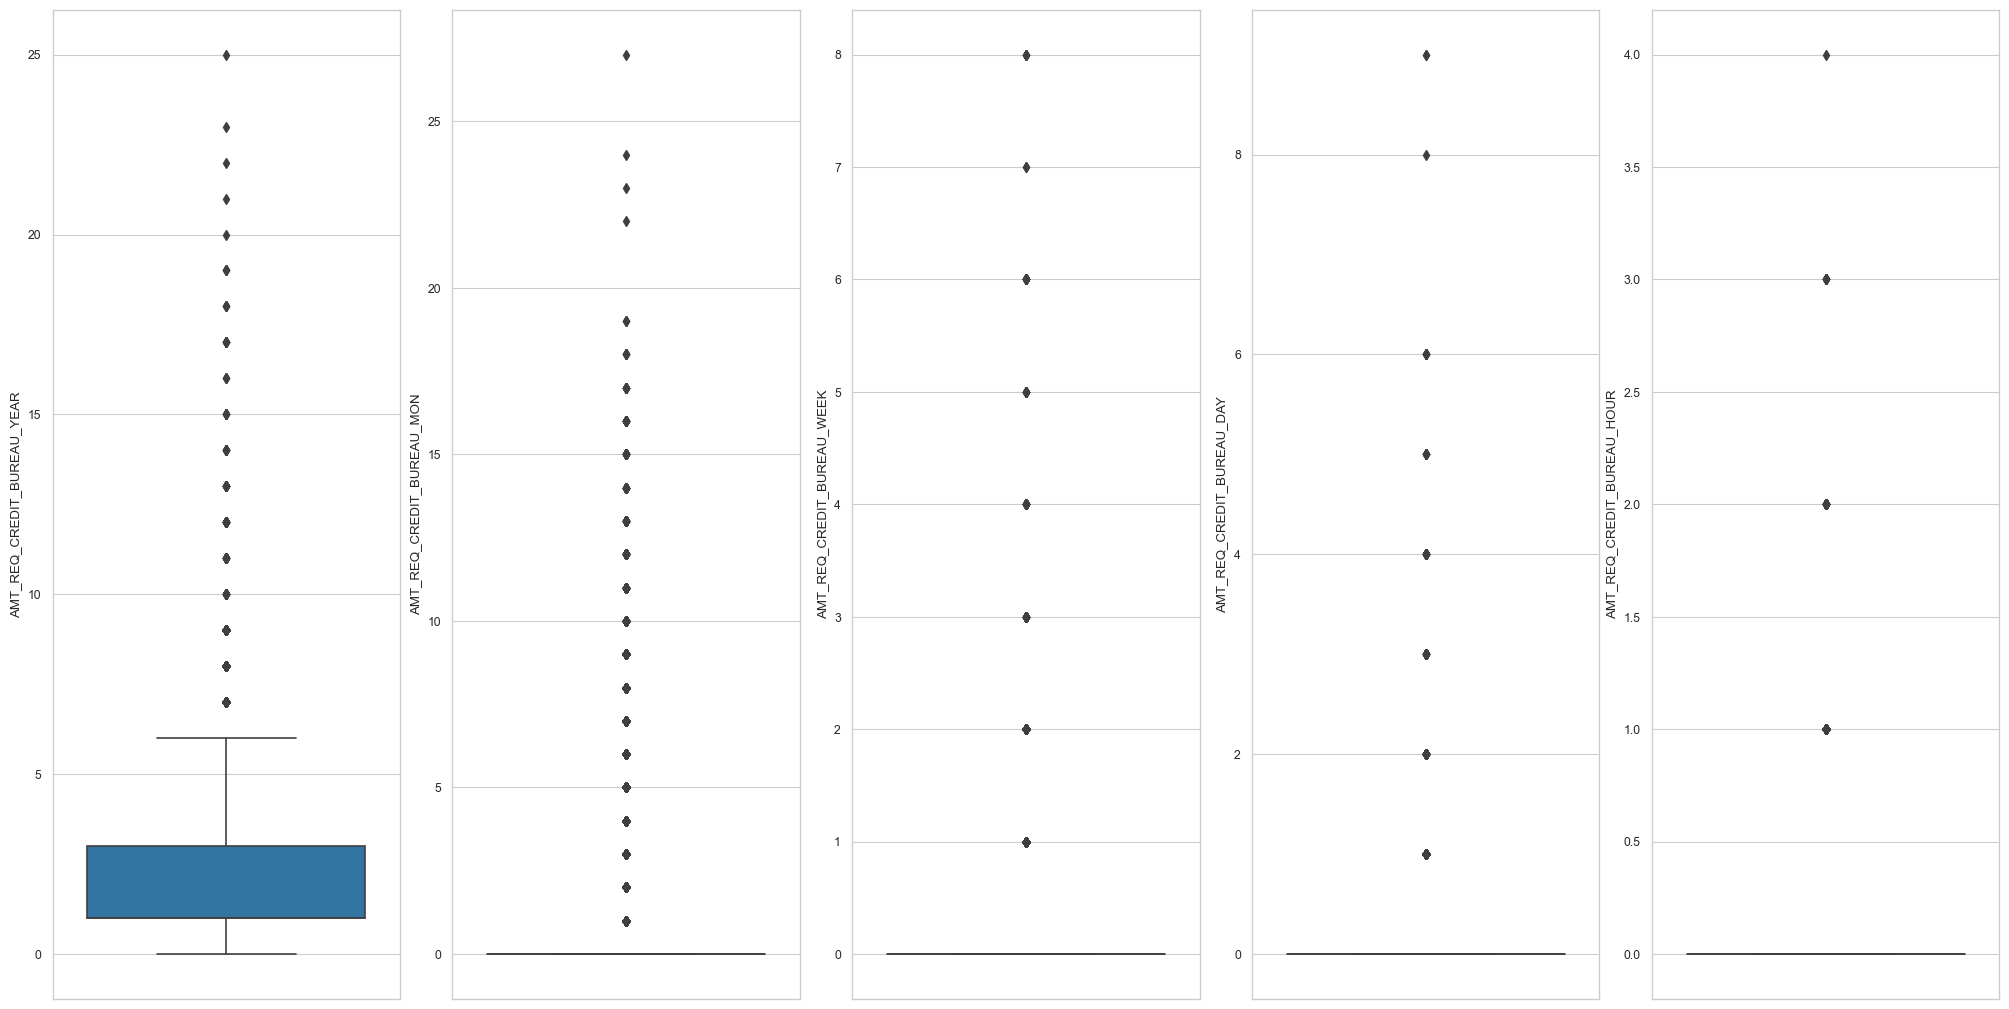

In [81]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [82]:
# dataset that only consist numerical features part.4
int_features = df_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

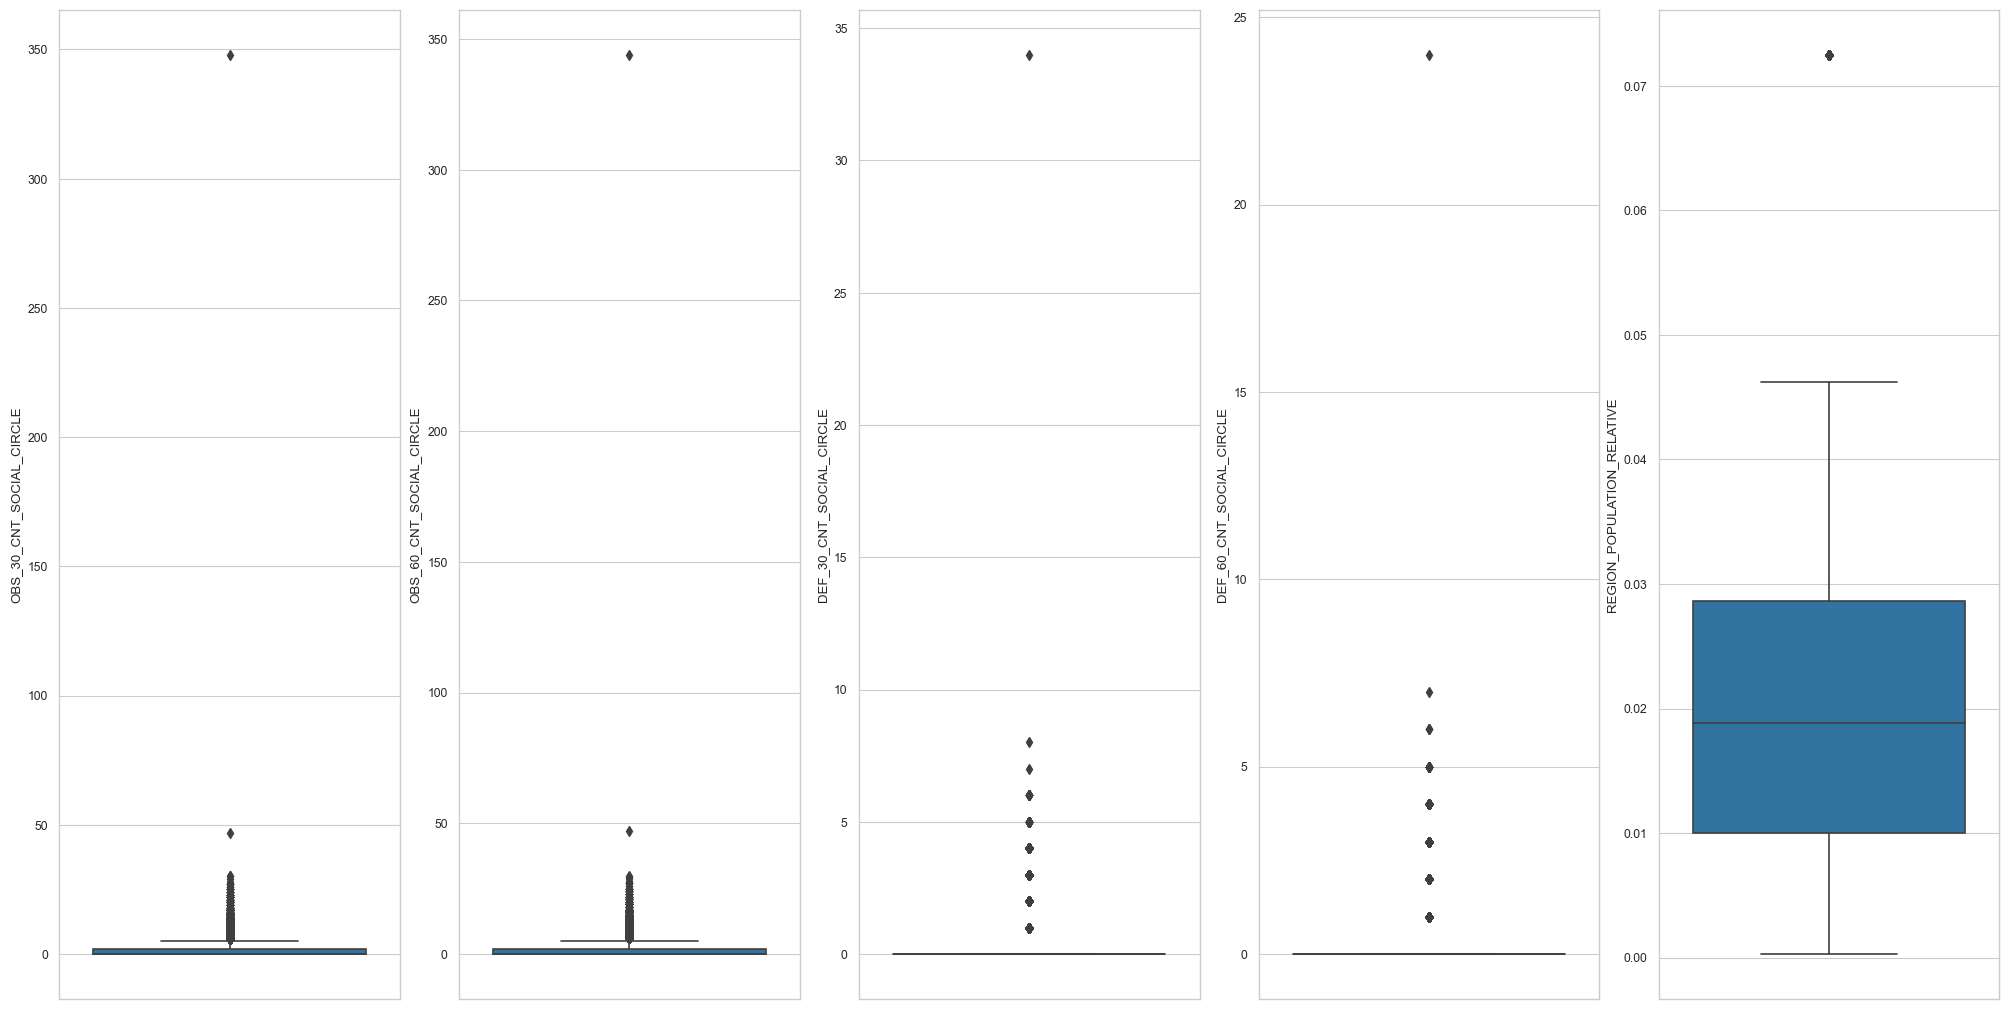

In [83]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [84]:
# dataset that only consist numerical features pt.5
int_features = df_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

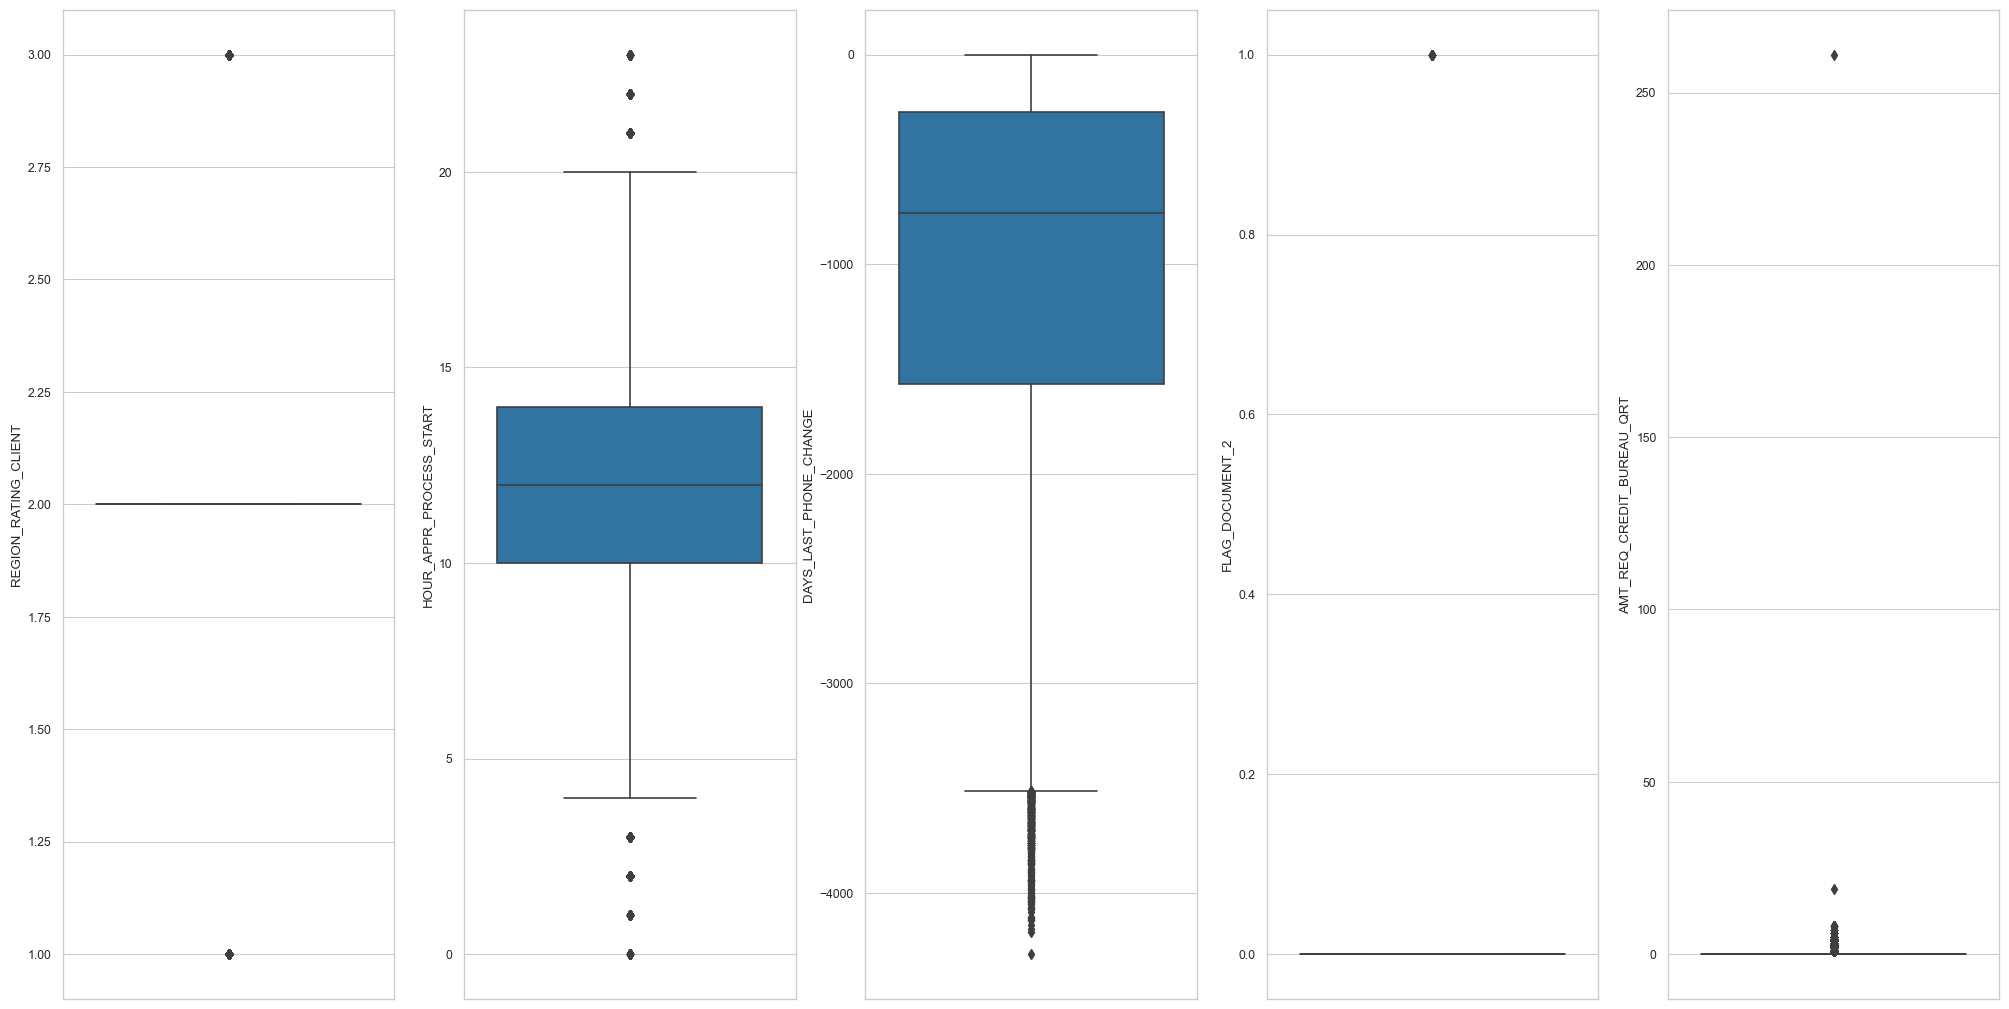

In [85]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Step Machine Learning Models

### - Label Encoding

In [86]:
# label encoder for object features
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [87]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### - Feature Selection

Drop Unnecessary Feature

In [88]:
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [89]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


###### Convert Negative Values to Positive Values

The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE

In [90]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

##### Feature Selection

In [91]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [92]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


Dapat terlihat bahwa fitur yang berkorelasi baik dengan kesulitan pembayaran.
1. Best features: DAYS_EMPLOYED, AMT_GOODS_PRICE, and AMT_CREDIT

2. Worst features: FLAG_MOBIL, FLAG_CONT_MOBILE, and AMT_REQ_CREDIT_BUREAU_HOUR

#### Handling Data Imbalance¶

In [93]:
# create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['TARGET']==0)] 
df_minority = df_train[(df_train['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

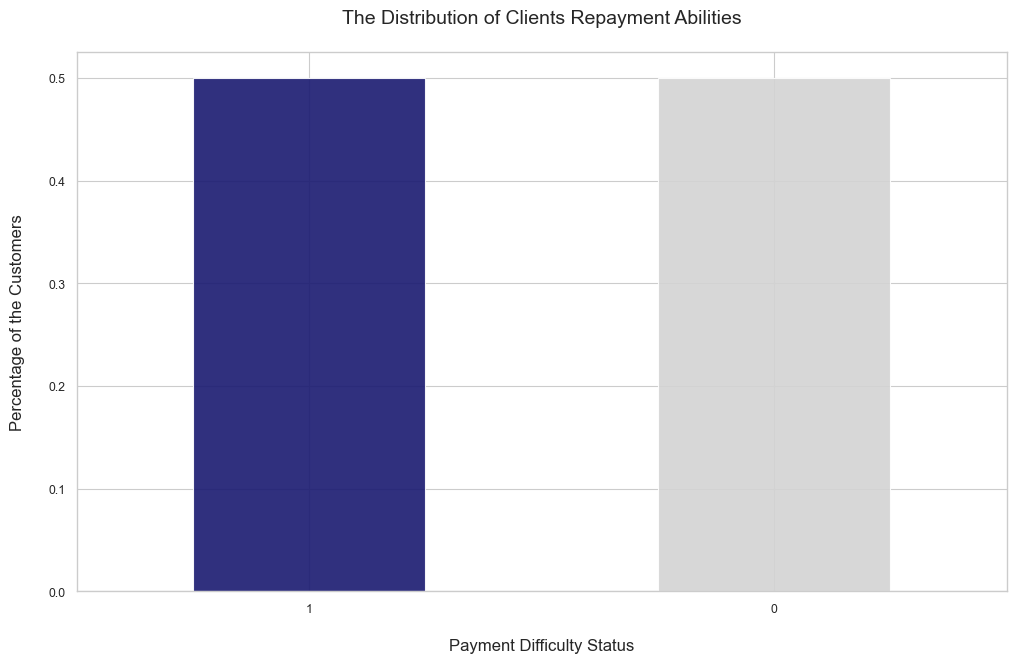

In [94]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

### Data Splitting

In [95]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [96]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [97]:
# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Algorithms
Beberapa algoritma yang akan digunakan untuk melakukan tes yaitu:

1.Logistic Regression

2.Gaussian Naive Bayes

3.Decision Tree

4.Random Forest

5.K-Nearest Neighbor

6.Neural Network

#### 1. LOGISTIC REGRESSION

In [98]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [99]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



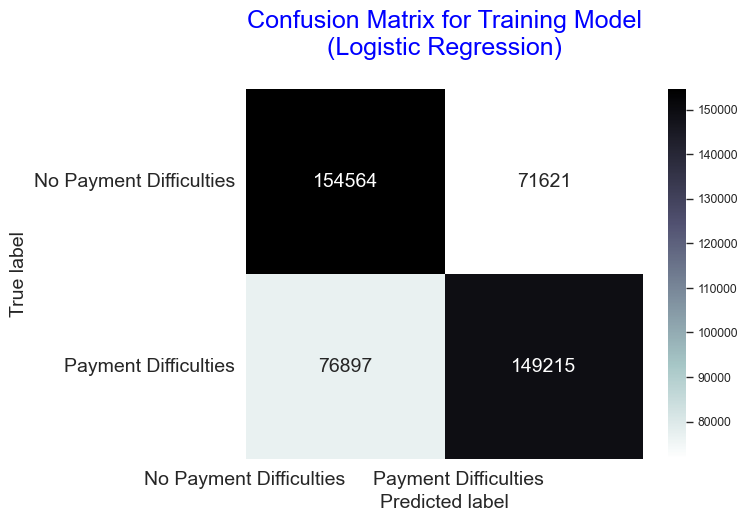

In [100]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='blue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [101]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



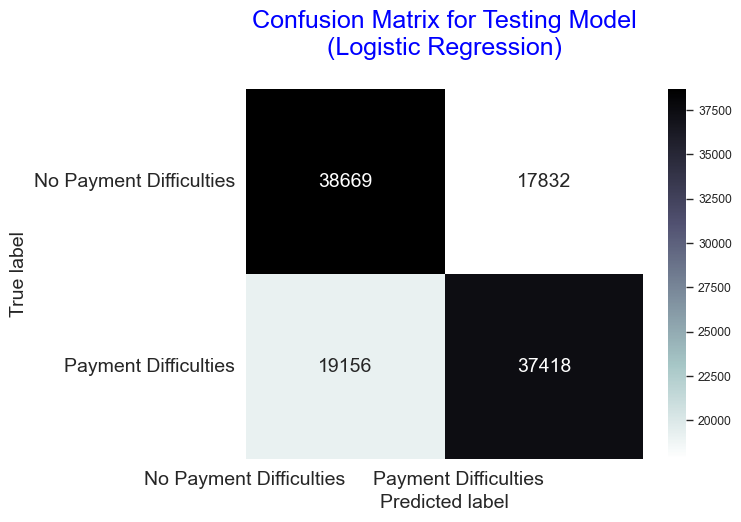

In [102]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='blue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [103]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.16
Test Accuracy: % 67.29


In [104]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6729


#### 2. GAUSSIAN NAIVE BAYES

In [105]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [106]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.57      0.84      0.68    226185
           1       0.69      0.37      0.48    226112

    accuracy                           0.60    452297
   macro avg       0.63      0.60      0.58    452297
weighted avg       0.63      0.60      0.58    452297



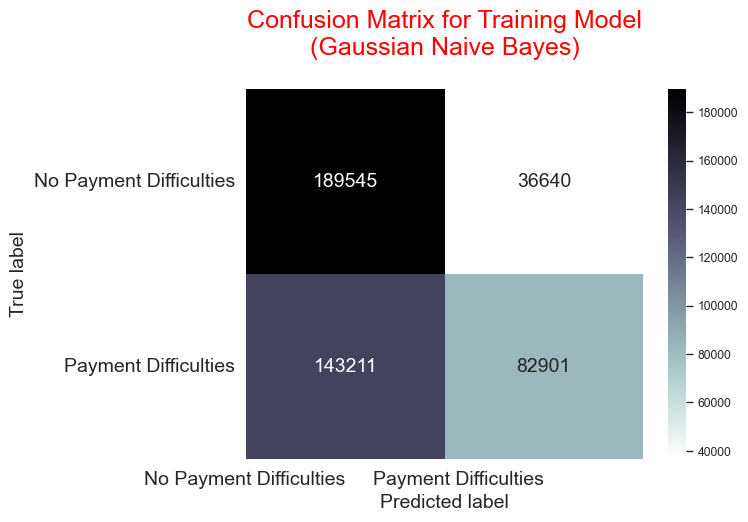

In [107]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [108]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.57      0.84      0.68     56501
           1       0.70      0.36      0.48     56574

    accuracy                           0.60    113075
   macro avg       0.63      0.60      0.58    113075
weighted avg       0.64      0.60      0.58    113075



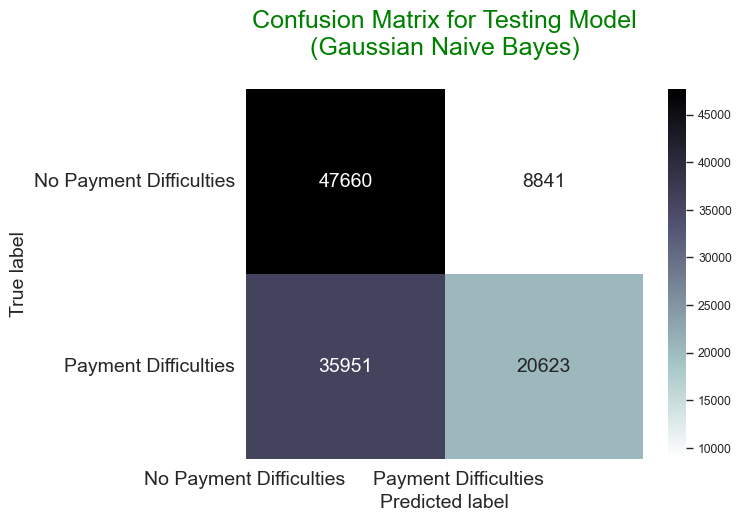

In [109]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='green')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [110]:
accuracy_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
accuracy_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(accuracy_nb_train))
print("Test Accuracy: % {}".format(accuracy_nb_test))

Training Accuracy: % 60.24
Test Accuracy: % 60.39


In [111]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.604


### 3. DECISION TREE

In [112]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [113]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



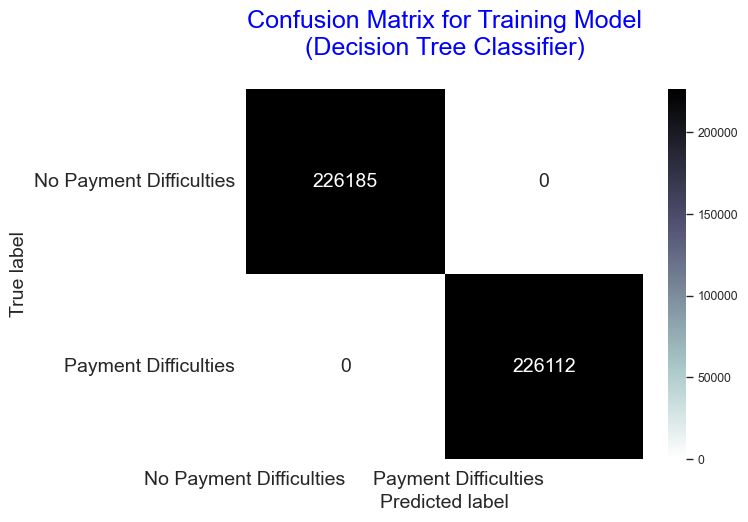

In [114]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='blue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [115]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     56501
           1       0.90      0.86      0.88     56574

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



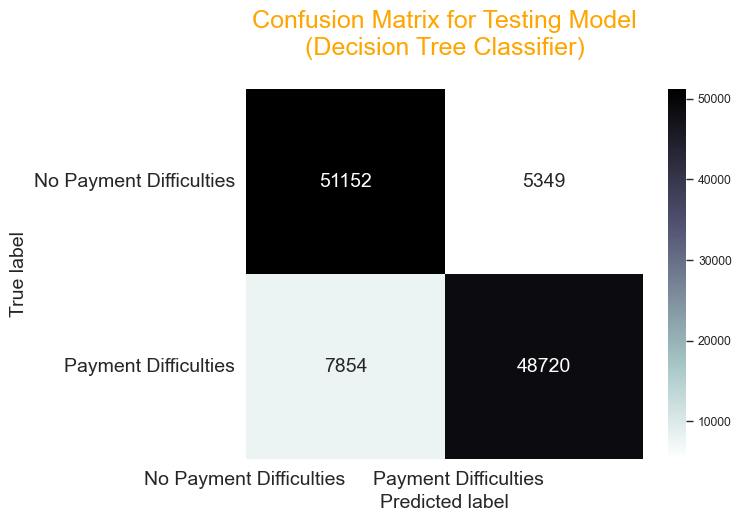

In [116]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='orange')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [117]:
accuracy_dt_train=round(dt_model.score(X_train,y_train)*100,2)
accuracy_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(accuracy_dt_train))
print("Test Accuracy: % {}".format(accuracy_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 88.32


In [118]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8833


### 4. RANDOM FOREST

In [120]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [121]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



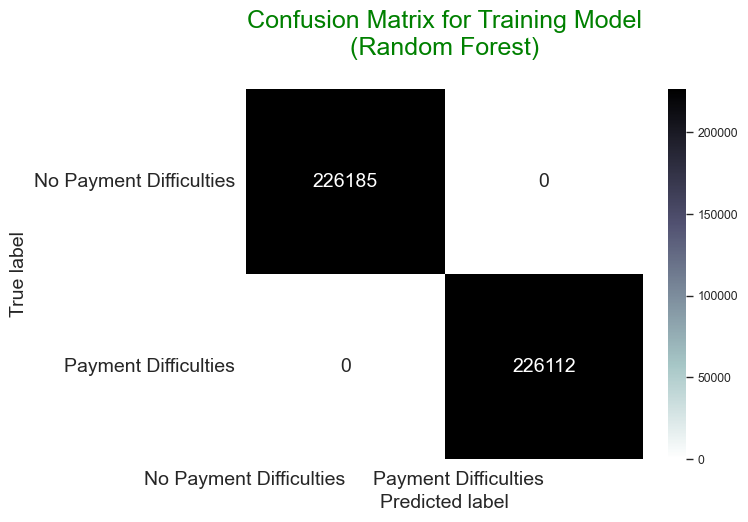

In [679]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='green')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [680]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



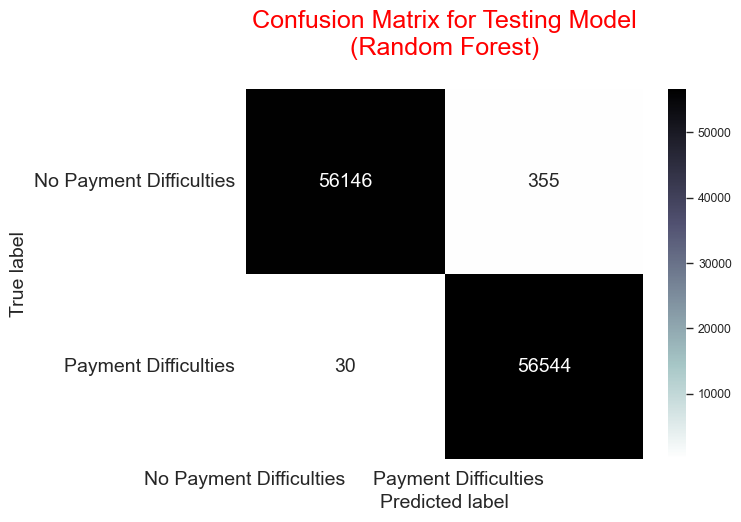

In [681]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [682]:
accuracy_rf_train=round(rf_model.score(X_train,y_train)*100,2)
accuracy_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(accuracy_rf_train))
print("Test Accuracy: % {}".format(accuracy_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.66


In [683]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9966


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17012\1167000606.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


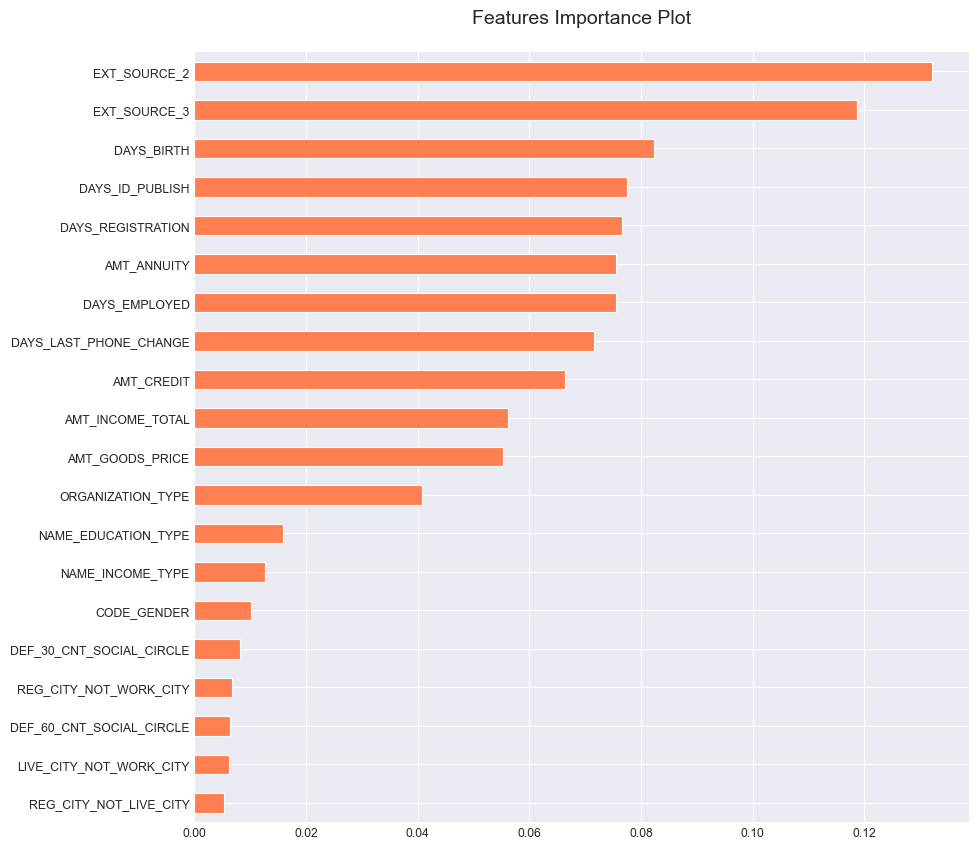

In [690]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='coral')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

Plot di atas membuktikan bahwa 5 fitur terpenting adalah EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH, dan DAYS_REGISTRATION

### 5. K-NEAREST NEIGHBORS

In [122]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [ ]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

In [ ]:
# ROC scores
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

### 6. Neural Network

In [ ]:
# train the model
nn_model = MLPClassifier().fit(X_train, y_train)

In [ ]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

In [ ]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

###### Model Selection

In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],["Gaussian Naive Bayes", 0.6024, 0.6039, 0.604],
                       ["Decision Tree", 1, 0.8826, 0.8826],["Random Forest", 1, 0.9965, 0.9965],
                       ["K-Nearest Neighbor", 0.9156, 0.8807, 0.8806], ["Neural Network", 0.7001, 0.6948, 0.6948]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

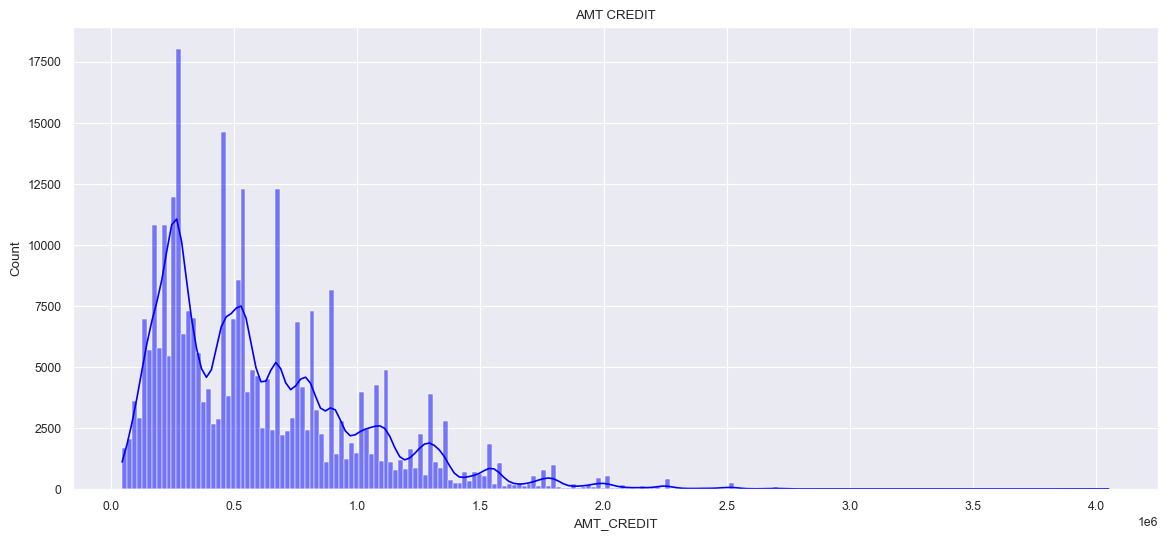

In [157]:
plt.figure(figsize = (14,6))
plt.title('AMT CREDIT')
sns.set_color_codes("pastel")
sns.histplot(df_train['AMT_CREDIT'],kde=True,bins=200, color="blue")
plt.show()

# Predict Using Test Data

In [169]:
df_test = pd.read_csv("../Final Project Rakamin/application_test.csv")
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

##### Data Preprocessing

Detecting Duplication

In [493]:
print('The number of duplication is:', df_test.duplicated().sum())
# there is no duplication

Number of rows and columns in train dataset:  (307511, 55)
Number of rows and columns in test dataset:  (971277, 122)
Number of rows and columns in train + test dataset:  (1278788, 122)


0

Detecting Missing Values

In [499]:
# drop features that have large number of missing values (± 50%)
df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)
df_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [500]:
# after drop some features
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

,missing_value,%missing_value,dtypes,N unique
NAME_CONTRACT_TYPE,0,0.00,object,2
CODE_GENDER,0,0.00,object,3
FLAG_OWN_CAR,0,0.00,object,2
FLAG_OWN_REALTY,0,0.00,object,2
NAME_INCOME_TYPE,0,0.00,object,8
NAME_EDUCATION_TYPE,0,0.00,object,5
NAME_FAMILY_STATUS,0,0.00,object,6
NAME_HOUSING_TYPE,0,0.00,object,6
WEEKDAY_APPR_PROCESS_START,0,0.00,object,7
ORGANIZATION_TYPE,0,0.00,object,58


In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [ ]:
# after imputation
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

###### Label Encoding

In [ ]:
# label encoder for object features
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [ ]:
df_test.head()

In [ ]:
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

#### Prediction

In [ ]:
pred_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

In [ ]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()